In [1]:
%matplotlib inline
import yt
import numpy as np
import deepdish as dd
import matplotlib.pyplot as plt
from scipy.optimize import brentq

from galaxy_analysis.utilities import utilities

from galaxy_analysis.plot.plot_styles import *
from galaxy_analysis.analysis import Galaxy
from galaxy_analysis.utilities import functions
from galaxy_analysis.particle_analysis import particle_types as ptypes

import time


WDIR = '/home/emerick/work/enzo_runs/pleiades/starIC/run11_30km/final_sndriving/'


/home/emerick/anaconda2/lib/python2.7/site-packages/astroML/time_series/periodogram.py:8: UserWarning: Using slow version of lomb_scargle. Install astroML_addons to use an optimized version
  warnings.warn("Using slow version of lomb_scargle. Install astroML_addons "
/home/emerick/code/galaxy_analysis/particle_analysis/IMF.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module

/home/emerick/code/galaxy_analysis/particle_analysis/sn_rate.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477

/home/emerick/code/galaxy_analysis/plot/plot_styles.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in star

In [2]:
gal = Galaxy('DD0349', wdir = WDIR)

Parsing Hierarchy : 100%|██████████| 1966/1966 [00:00<00:00, 15727.76it/s]
/home/emerick/anaconda2/lib/python2.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


tracer species present:  ['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
16 mass fields defined
16 mass fraction fields defined
15 number density fields defined
129 abundance ratio fields defined
129 particle abundance ratio fields defined
5 additional helper fields defined


Parsing Hierarchy : 100%|██████████| 3845/3845 [00:00<00:00, 14342.13it/s]
/home/emerick/code/onezone/data_tables.py:89: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if  c == flag or id == flag:


In [3]:
# stars_lifetime = gal.df[('io','particle_model_lifetime')]

In [4]:
data = dd.io.load(WDIR + 'gas_abundances_5Myr.h5')

/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in divide
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in divide
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in greater
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in less


Molecular DD0085 failure
Molecular DD0095 failure
Molecular DD0105 failure
HIM DD0440 failure
HIM DD0510 failure
HIM DD0515 failure


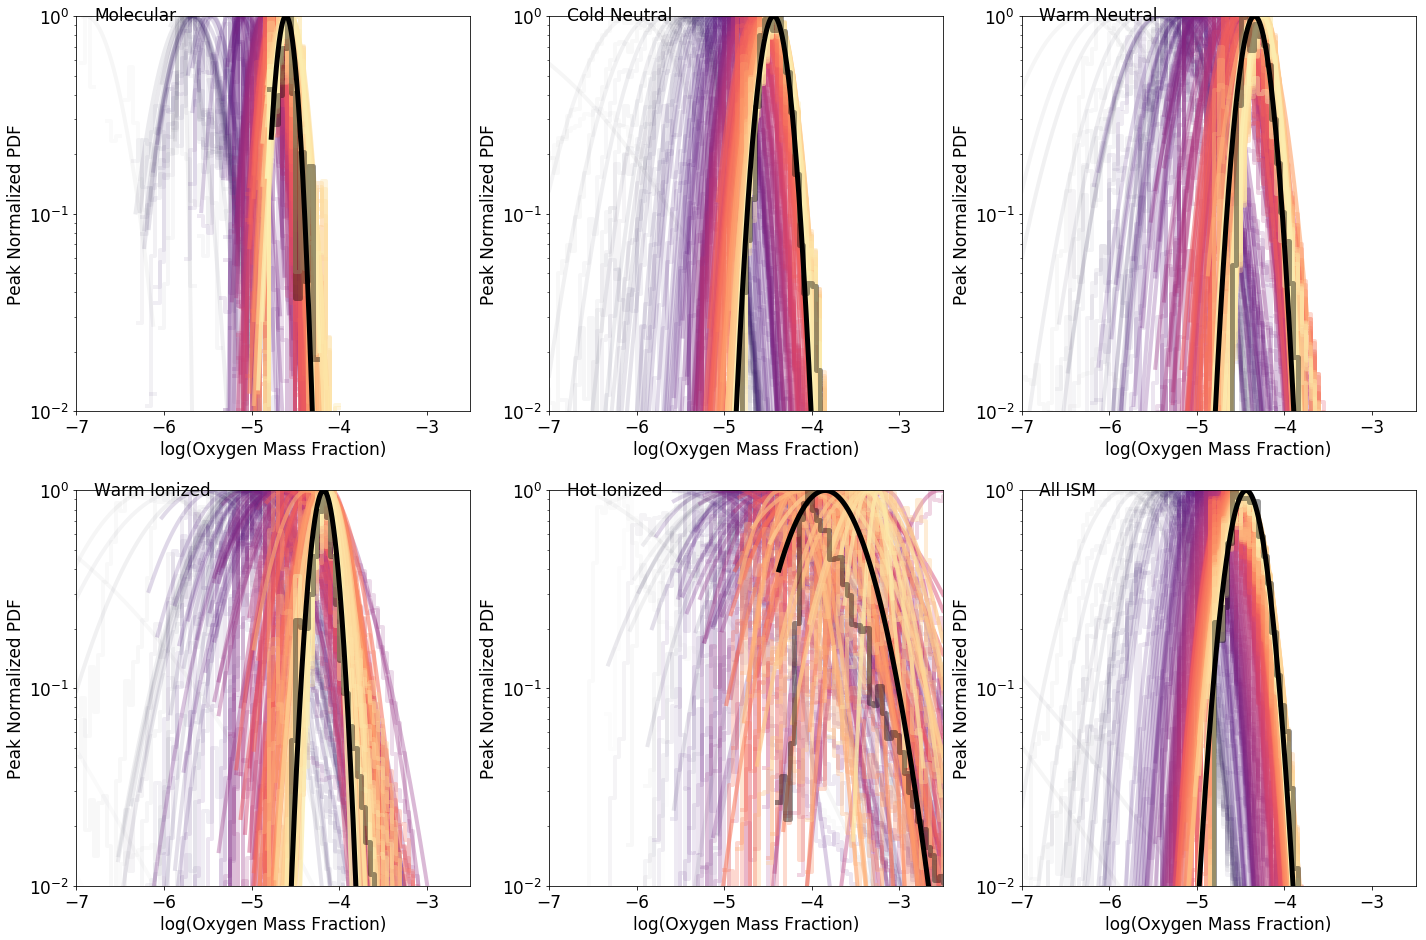

In [17]:
nrow = 2
ncol = 3

fig, all_ax = plt.subplots(nrow,ncol)
fig.set_size_inches(8*ncol,8*nrow)

fbins   = data['DD0100']['Disk']['mass_fraction']['bins']
binsize =       (fbins[1:]) - (fbins[:-1])
centers = 0.5 * (fbins[1:] + fbins[:-1])

phase = 'Molecular'
field = 'O_Fraction'
ylim = [0.0,6]

ds_list = np.arange(80.0, 521, 5)

min_median = 1.0E80
max_median = -1.0E80

axi = 0
axj = 0
phases = ['Molecular','CNM','WNM','WIM','HIM','Disk']
phase_labels = ['Molecular','Cold Neutral','Warm Neutral','Warm Ionized','Hot Ionized','All ISM']


mean_phase = {}
std_phase  = {}
actual_mean_phase = {}
actual_std_phase  = {}
time = np.zeros(np.size(ds_list))

for k in phases:
    mean_phase[k] = np.zeros(np.size(ds_list))
    std_phase[k]  = np.zeros(np.size(ds_list))
    actual_mean_phase[k] = np.zeros(np.size(ds_list))
    actual_std_phase[k]  = np.zeros(np.size(ds_list))


xmin = 10000
xmax = -1000000
for i,j in enumerate(ds_list):
    dsname = 'DD%0004i'%(j)
    axi = 0
    axj = 0
    for ip, phase in enumerate(phases):
       # print axi, axj, phase
        ax = all_ax[(axi, axj)]
        
        y = data[dsname][phase]['mass_fraction'][field]['hist']
        mean = data[dsname][phase]['mass_fraction'][field]['mean']
        std = data[dsname][phase]['mass_fraction'][field]['std']
        median = np.log10(np.interp(0.5, np.cumsum(y)/(1.0*np.sum(y)), centers))
        label = data[dsname]['general']['Time'] - 46.0
    
    
        min_median = np.min([median, min_median])
        max_median = np.max([median, max_median])
    
        frac = 0.8
        alpha = ((i / (np.size(ds_list)*1.0))) * frac
        halpha = ((i / (np.size(ds_list)*1.0))) * frac * 0.5
        color = magma(alpha/frac) #'black' # viridis(alpha)
        lw   = 4.0
        hlw  = 4.0
        if j == np.max(ds_list):
            color = 'black'
            alpha = 1.0
            lw    = 5.0
            hlw   = 5.0
    
        norm_y = y / binsize
        plot_bins = np.log10(fbins)
        plot_histogram(ax, plot_bins, norm_y/np.max(norm_y), lw = hlw, color = color, alpha = halpha)

        selection = (y > 0) * (centers > 10**(median - 4)) * (centers < 10**(median+4))
        fit_x     = centers[selection]
        y_to_fit  = norm_y[selection]
    
        # take initial guess parameters from distribution values - compute logged dist values
        try:
            u_guess   = np.log( mean / (np.sqrt(1.0 + std*std/(mean*mean))))
            std_guess = np.sqrt(np.log(1.0 + std*std/(mean*mean)))
            xplot = np.logspace(np.log10(np.min(fit_x)), np.log10(np.max(fit_x)),4000)
            lognorm    = functions.lognormal()
            popt, pcov = lognorm.fit_function(fit_x, y_to_fit, p0 = [u_guess, std_guess])     
            xplot = np.logspace(np.log10(np.min(fit_x)), np.log10(np.max(fit_x)),4000)
            yplot = lognorm._f(xplot, *popt)
            ax.plot(np.log10(xplot), yplot/np.max(yplot), lw = lw, color = color , ls = '-', alpha = alpha) #, label = 'Fit')     
        except:
            print phase, dsname, 'failure'
            popt = [None, None]
            
        mean_phase[phase][i] = popt[0]
        actual_mean_phase[phase][i] = mean
        std_phase[phase][i]  = popt[1]
        actual_std_phase[phase][i]  = std
        time[i]              = label
        
        
        axj = axj + 1
        
        if axj >= ncol:
            axi = axi + 1
            axj = 0
        

        xmin = np.min([np.log10(xplot[0]),xmin])
        xmax = np.max([np.log10(xplot[-1]),xmax])
        
        
for i in np.arange(2):
    for j in np.arange(3):
        all_ax[(i,j)].set_xlim(xmax - 5, xmax)
        all_ax[(i,j)].semilogy()
        all_ax[(i,j)].set_ylim(1.0E-2,1.0)

        ba =  8
        ba = 0
        all_ax[(i,j)].set_xlim(-7 - ba, -2.5 - ba)   

        xy = (np.min(all_ax[(i,j)].get_xlim())+ 0.2,np.max(all_ax[(i,j)].get_ylim())*0.95)
        all_ax[(i,j)].annotate(phase_labels[(3)*(i) + j], xy = xy, xytext=xy)
        all_ax[(i,j)].set_xlabel(r'log(Oxygen Mass Fraction)')
        all_ax[(i,j)].set_ylabel(r'Peak Normalized PDF')
    #ax.set_xlim( np.log10(min_median) - 2, np.log10(max_median) + 2)

#fig.savefig(field + '_phase_evolution.png')

fig.savefig('log_panel_phase_evolution.png')

In [7]:
print data['DD0500']['CNM']['mass_fraction']['O_Fraction'].keys()
print np.sort(data.keys())

['Q1', 'std', 'Q3', 'decile_9', 'min', 'max', 'decile_1', 'hist', 'median', 'inner_quartile_range', 'd9_d1_range', 'mode', 'variance', 'mean']
['DD0050' 'DD0055' 'DD0060' 'DD0065' 'DD0070' 'DD0075' 'DD0080' 'DD0085'
 'DD0090' 'DD0095' 'DD0100' 'DD0105' 'DD0110' 'DD0115' 'DD0120' 'DD0125'
 'DD0130' 'DD0135' 'DD0140' 'DD0145' 'DD0150' 'DD0155' 'DD0160' 'DD0165'
 'DD0170' 'DD0175' 'DD0180' 'DD0185' 'DD0190' 'DD0195' 'DD0200' 'DD0205'
 'DD0210' 'DD0215' 'DD0220' 'DD0225' 'DD0230' 'DD0235' 'DD0240' 'DD0245'
 'DD0250' 'DD0255' 'DD0260' 'DD0265' 'DD0270' 'DD0275' 'DD0280' 'DD0285'
 'DD0290' 'DD0295' 'DD0300' 'DD0305' 'DD0310' 'DD0315' 'DD0320' 'DD0325'
 'DD0330' 'DD0335' 'DD0340' 'DD0345' 'DD0350' 'DD0355' 'DD0360' 'DD0365'
 'DD0370' 'DD0375' 'DD0380' 'DD0385' 'DD0390' 'DD0395' 'DD0400' 'DD0405'
 'DD0410' 'DD0415' 'DD0420' 'DD0425' 'DD0430' 'DD0435' 'DD0440' 'DD0445'
 'DD0450' 'DD0455' 'DD0460' 'DD0465' 'DD0470' 'DD0475' 'DD0480' 'DD0485'
 'DD0490' 'DD0495' 'DD0500' 'DD0505' 'DD0510' 'DD0515'

In [26]:
from scipy import integrate

def _load_data(ldata, dsname, phase, field, centers = None, IQR = False):
    y      = ldata[dsname][phase]['mass_fraction'][field]['hist']
    mean   = ldata[dsname][phase]['mass_fraction'][field]['mean']
    std    = ldata[dsname][phase]['mass_fraction'][field]['std']
    iqr    = ldata[dsname][phase]['mass_fraction'][field]['inner_quartile_range']
    label  = ldata[dsname]['general']['Time'] - 46.0
    
    #if (not ('median' in ldata[dsname][phase]['mass_fraction'][field].keys())):
    median = np.log10(np.interp(0.5, np.cumsum(y)/(1.0*np.sum(y)), centers))
    #else:
    #    print 'loading median from file'
    #    median = ldata[dsname][phase]['mass_fraction'][field]['median']
    
    if IQR:
        return y, mean, median, std, label, iqr
    else:
        return y, mean, median, std, label

def _poisson_error(y):
    N = np.sum(y) * 1.0
    error = np.sqrt(y*y*(N+y)/(N**3))
    return error

def _compute_fit_and_plot(ax, bins, y, mean=None, median=None, std=None, show_hist = True, plot_PDF = True,
                          plot_CDF = False, alpha = 0.5, halpha = 0.25, color = 'black', ls = '-', Mtot = 1.0E4,
                          fit_only = False):
    
    D_KS = None
    D_KS_alpha = None
    CDF_diff = None
    KS_alpha = None
    
    if plot_CDF:
        plot_PDF = False
    
    binsize =       (bins[1:]) - (bins[:-1])
    centers = 0.5 * (bins[1:] + bins[:-1])
    
    frac = 0.8
    lw   = 4.0
    hlw  = 4.0
    
    #if j == np.max(ds_list):
    #    color = 'black'
    #    alpha = 1.0
    #    lw    = 5.0
    #    hlw   = 5.0
    
    norm_y = y / binsize
    plot_bins = np.log10(bins)
    if show_hist and (not fit_only):
        if plot_PDF:
            plot_histogram(ax, plot_bins, norm_y/np.max(norm_y), lw = hlw, color = color, alpha = halpha, ls = ls)
        elif plot_CDF:
            plot_histogram(ax, plot_bins, np.cumsum(y), lw = hlw, color = color, alpha = halpha, ls = ls)
        else:
            plot_histogram(ax, plot_bins, y, lw = hlw, color = color, alpha = halpha, ls = ls)
    
    if ((mean is not None) and (median is not None) and (std is not None)):
            
        selection = (y > 0) * (centers > 10**(median - 4)) * (centers < 10**(median+4))
        selection = (y > np.max(y)*1.0E-3) # * (centers > 10**(median - 4)) * (centers < 10**(median + 4))
        
        if np.size(centers[selection]) < 3:
            selection = (y > 0) * (centers > 10**(median-4)) * (centers < 10**(median+4))
            
            if np.size(centers[selection]) < 3:
                print y
                
        fit_x     = centers[selection]
        y_to_fit  = norm_y[selection]
                
       # print fit_x
        
        # take initial guess parameters from distribution values - compute logged dist values
        if True:
            #error      = _poisson_error(y[selection]*Mtot) / Mtot
            #norm_error = error / binsize[selection]
            
            norm_error = np.sqrt(y[selection]*Mtot) / binsize[selection] / Mtot
            #norm_error = 0.01 * norm_y[selection]
            #if np.size(norm_error[ norm_error > y_to_fit]) > 0:
            #    norm_error[norm_error > y_to_fit] = 0.95*y_to_fit[norm_error>y_to_fit]
            if np.size(norm_error[norm_error == 0.0]) > 0:
                print 'getting zero error'
                # norm_error[norm_error == 0.0] = np.median(norm_error[norm_error>0])
            
            u_guess   = np.log( mean / (np.sqrt(1.0 + std*std/(mean*mean))))
            std_guess = np.sqrt(np.log(1.0 + std*std/(mean*mean)))
            xplot = np.logspace(np.log10(np.min(fit_x)), np.log10(np.max(fit_x)),4000)
            lognorm    = functions.lognormal()
            # print mean, std, u_guess, std_guess
            popt, pcov = lognorm.fit_function(fit_x, y_to_fit, p0 = [u_guess, std_guess], 
                                                       # sigma = norm_error, absolute_sigma = False, 
                                                       bounds = ([-60,0],[0,10]))     
            xplot = np.logspace(np.log10(np.min(fit_x))-3, np.log10(np.max(fit_x))+3,4000)
            yplot = lognorm._f(xplot, *popt)
            
            #
            # Testing soem things here for goodness of fit estimation
            #
            
            # 1) chi squared - errors are hard
            chisqr          = np.sum( (lognorm._f(fit_x, *popt) - y_to_fit)**2 / (norm_error)**2)
            reduced_chisqr  = chisqr / (np.size(y_to_fit) - 2.0)
            
            # 2) Cumulative distribution and computing D between the two distributions
            mf = np.zeros(np.size(bins)-1)
            func = lambda x : lognorm._f(x, *popt)
            for i in np.arange(0, np.size(bins)-1):
                mf[i] = integrate.quad(func, bins[i], bins[i+1])[0]
            mf = np.cumsum(mf)
            CDF_diff = np.cumsum(y) - mf
            D_KS     = np.max(np.abs(CDF_diff))
            D_KS_alpha = np.sqrt(2.0/ (1.0*np.size( y[>0]) )*np.size(y[>0]))                
            KS_alpha = 2.0 * np.log(- 2.0 *(D_KS / D_KS_alpha)**2)
            
            
            if not fit_only:
                if plot_PDF:
                    ax.plot(np.log10(xplot), yplot/np.max(yplot), lw = lw, color = color , ls = ls, alpha = alpha) #, label = 'Fit')     
                elif plot_CDF:
                    cplot = (bins[1:] + bins[:-1])*0.5  
                    ax.plot(np.log10(cplot), mf, lw = lw, color = color, ls = ls, alpha = alpha)
                    ax.plot([np.log10(cplot)[-1], 0], [mf[-1]]*2, lw = lw, color = color, ls = ls, alpha = alpha)

                                  
                
            else:
                mf = np.zeros(np.size(bins)-1)
                func = lambda x : lognorm._f(x, *popt)
                for i in np.arange(0, np.size(bins)-1):
                    mf[i] = integrate.quad(func, bins[i], bins[i+1])[0]
                    
                if not fit_only:
                    cplot = (bins[1:] + bins[:-1])*0.5    
                    ax.plot(np.log10(cplot), mf, lw = lw, color = color, ls = ls, alpha = alpha)
                
                
        else:
            print phase, dsname, 'failure'
            popt = [None, None]
        # print np.trapz(yplot,xplot)
  
        pdf_mean   = np.trapz(centers * norm_y, x = centers)
    
        pdf_mf = np.zeros(np.size(bins)-2)
        func = lambda x : np.interp(x, centers, norm_y)
        for i in np.arange(0, np.size(bins)-2):
            pdf_mf[i] = integrate.quad(func, bins[i+1], bins[i+2])[0]  
        pdf_mf = np.cumsum(pdf_mf)
        
        pdf_median = np.interp(0.5, pdf_mf, centers[1:])
        pdf_mode   = np.argmax( norm_y )
        pdf_std    = np.sqrt( np.trapz(centers*centers*norm_y, x = centers) - pdf_mean**2)
        
        # return x values of fit, mean of fit, and std of fit
        mean_fit = popt[0]
        std_fit  = popt[1]
        output_dict = {'mean' : mean_fit, 'std' : std_fit, 'chisqr' : chisqr, 'norm_error' : norm_error,
                       'rchisqr' : reduced_chisqr, 'npoints' : np.size(y_to_fit), 'N' : np.size(y_to_fit),
                       'fit_x' : fit_x, 'rel_error' : np.abs(norm_error/norm_y[selection]),
                       'CDF_diff' : CDF_diff, 'D_KS' : D_KS, 'D_KS_alpha' : D_KS_alpha, 'KS_alpha' : KS_alpha,
                       'num_pdf_mean' : pdf_mean, 'num_pdf_median' : pdf_median, 'num_pdf_mode' : pdf_mode,
                       'num_pdf_std'  : pdf_std}
        
        return xplot, mean_fit, std_fit, output_dict
    else:
        if ((mean is not None) or (median is not None) or (std is not None)):
            print "Must provide mean, median, and std to enable a lognormal fit"
            raise ValueError

    # return nothing if just plotting the line and doing no fitting
    return
            
#        mean_phase[phase][i] = popt[0]
#        actual_mean_phase[phase][i] = mean
#        std_phase[phase][i]  = popt[1]
#        actual_std_phase[phase][i]  = std
#        time[i]              = label
            
        

SyntaxError: invalid syntax (<ipython-input-26-ed834449c5b1>, line 117)

In [15]:
fbins   = data['DD0100']['Disk']['mass_fraction']['bins']
binsize =       (fbins[1:]) - (fbins[:-1])
centers = 0.5 * (fbins[1:] + fbins[:-1])

phases = ['Molecular','CNM','WNM','WIM','HIM','Disk']
ds_list = np.arange(70, 751, 100) # [ 100, 150, 200, 250, 300, 350]
ele = ['O','Fe','N','Ba']


output_stats = {}
for dsi in ds_list:
    dsname = 'DD%0004i'%(dsi)
    output_stats[dsi] = {}
    
    for phase in phases:
        output_stats[dsi][phase] = {}
        for e in ele:
            
            field = e + '_Fraction'
            
            y, mean, median, std, label, iqr = _load_data(data, dsname, phase, field, centers = centers, IQR=True)
            Mtot = data[dsname][phase]['general']['total_mass']
     
            if (mean is None) or (np.size(y[y > 0]) == 0): # phase not present
                for k in output:
                    output[k] = None
                    
                output_stats[dsi][phase][e] = output
                continue
    
            xplot, mean_fit, std_fit, output = _compute_fit_and_plot(None, fbins, y, mean = mean, median = median, std = std,
                                                                     Mtot=Mtot,
                                                                     fit_only = True)
            output['actual_mean'] = mean
            output['actual_std']  = std
            output['actual_median'] = median
            output['actual_IQR'] = iqr
            output_stats[dsi][phase][e] = output
            
    print dsi

# convert to an array we can plot as a function of time
output_stats_data = {}
for phase in phases:
    output_stats_data[phase] = {}
    for e in ele:
        output_stats_data[phase][e] = {}        
        for k in output_stats[ds_list[0]][phase][e].keys():
            output_stats_data[phase][e][k] = np.array( [output_stats[x][phase][e][k] for x in ds_list])

/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in log


70
170
270
370
470
570


/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in divide
  # This is added back by InteractiveShellApp.init_path()


670


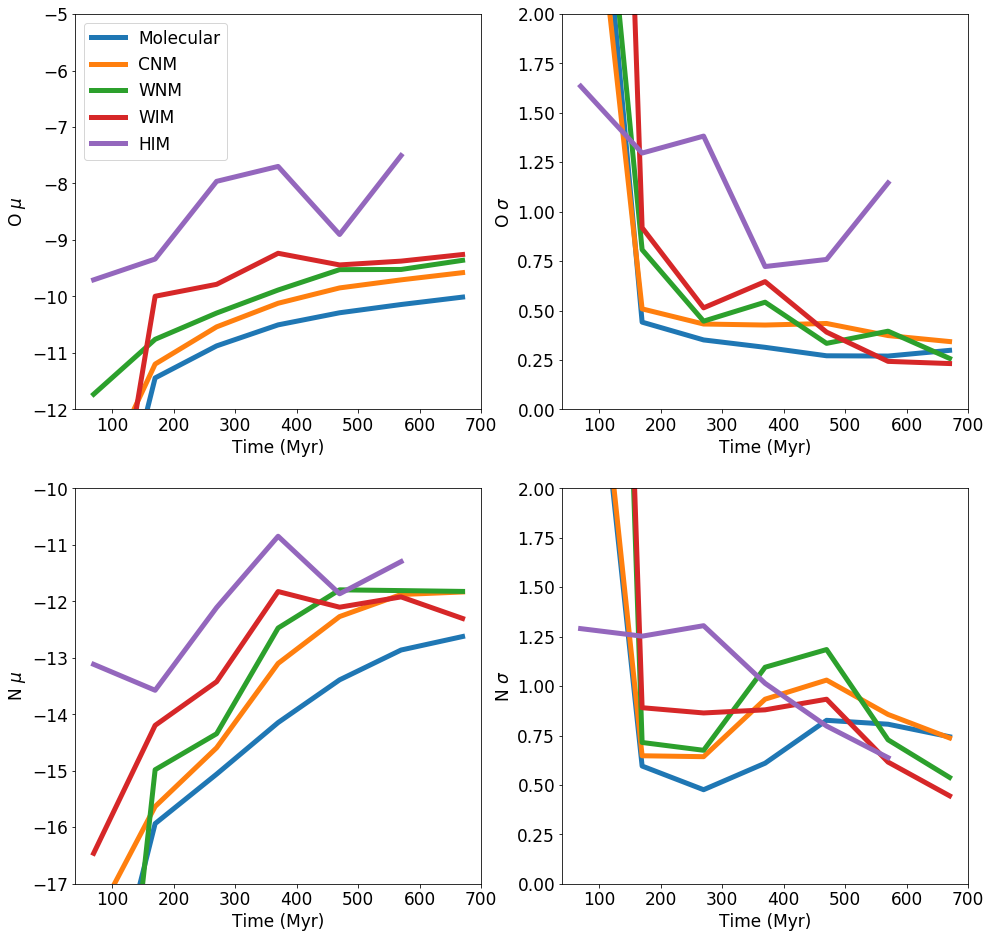

In [16]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16,16)

for i, phase in enumerate(['Molecular','CNM','WNM','WIM','HIM']):
    if phase == 'Disk':
        continue
        
    mean  = output_stats_data[phase]['O']['mean']
    std  = output_stats_data[phase]['O']['std']
    
    # mean = np.exp(M + 0.5*S**2)
    # std  = np.sqrt(np.exp(S**2 + 2.0 * M)*(np.exp(S*S) - 1.0))
    
    #select = 
        
    ax[(0,0)].plot(ds_list, mean, lw = 5, ls = '-', label = phase)
    ax[(0,1)].plot(ds_list, std ,  lw = 5, ls = '-', label = phase)
    ax[(0,0)].set_ylabel(r'O $\mu$')
    ax[(0,1)].set_ylabel(r'O $\sigma$')
    
    mean  = output_stats_data[phase]['N']['mean']
    std  = output_stats_data[phase]['N']['std']
    
    # mean = np.exp(M + 0.5*S**2)
    # std  = np.sqrt(np.exp(S**2 + 2.0 * M)*(np.exp(S*S) - 1.0))
    
    #select = 
    
    ax[(1,0)].plot(ds_list, mean, lw = 5, ls = '-', label = phase)
    ax[(1,1)].plot(ds_list, std ,  lw = 5, ls = '-', label = phase)
    ax[(1,0)].set_ylabel(r'N $\mu$')
    ax[(1,1)].set_ylabel(r'N $\sigma$')
    ax[(0,1)].set_ylim(0,2)
    ax[(1,1)].set_ylim(0,2)
    
for a in [(0,0),(0,1),(1,0),(1,1)]:
#    ax[a].set_xlim(0.0, np.max(time))
    ax[a].set_xlabel('Time (Myr)')
#ax[1].semilogy()
#ax[0].set_ylim(-8, -2)
#ax[1].set_ylim(1.0E-1, 100.0)

ax[(0,0)].set_ylim(-12,-5)
ax[(1,0)].set_ylim(-17,-10)


    
ax[(0,0)].legend(loc='best')


TypeError: unsupported operand type(s) for *: 'NoneType' and 'NoneType'

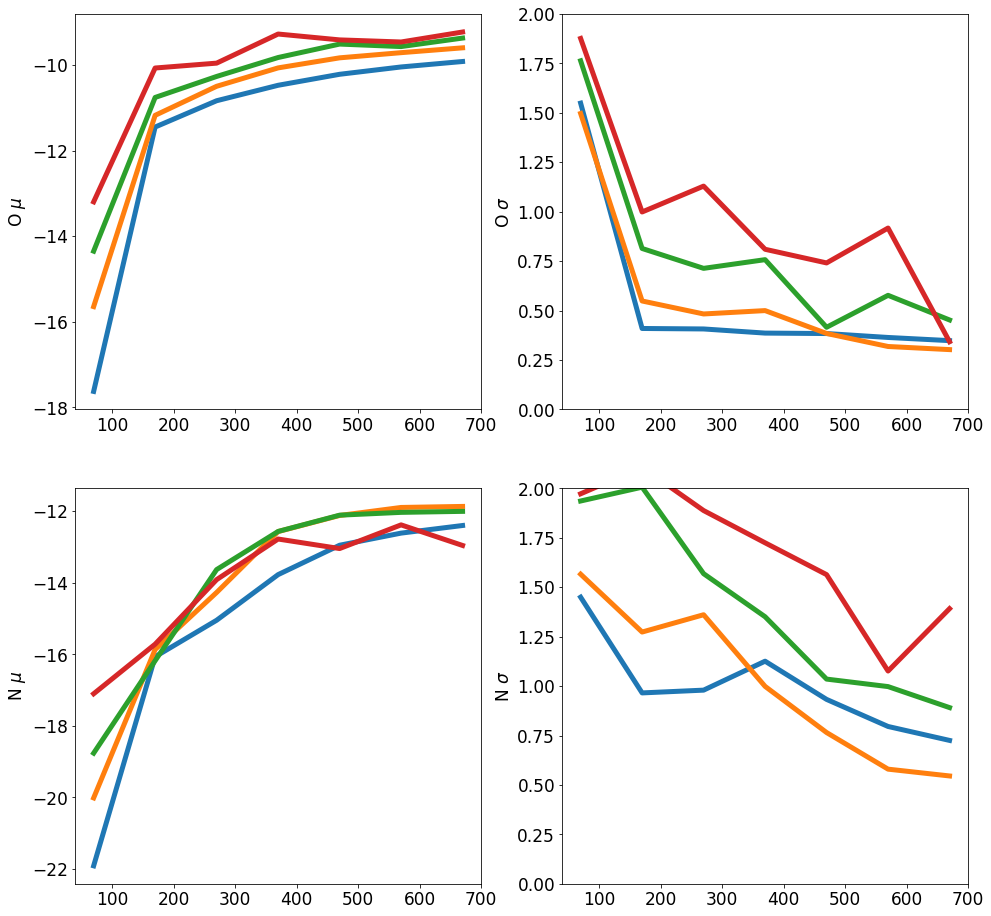

In [18]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16,16)

for i, phase in enumerate(['Molecular','CNM','WNM','WIM','HIM']):
    if phase == 'Disk':
        continue
        
    mean  = output_stats_data[phase]['O']['num_pdf_mean']
    std   = output_stats_data[phase]['O']['num_pdf_std']
    
    # mean = np.exp(M + 0.5*S**2)
    # std  = np.sqrt(np.exp(S**2 + 2.0 * M)*(np.exp(S*S) - 1.0))
    
    #select = 
    
    ln_mean = np.log(  mean / np.sqrt(1.0 + std**2/mean**2))
    ln_std  = np.sqrt(  np.log(1.0 + std**2/mean**2))
        
    ax[(0,0)].plot(ds_list, ln_mean, lw = 5, ls = '-', label = phase)
    ax[(0,1)].plot(ds_list, ln_std ,  lw = 5, ls = '-', label = phase)
    ax[(0,0)].set_ylabel(r'O $\mu$')
    ax[(0,1)].set_ylabel(r'O $\sigma$')
    
    mean  = output_stats_data[phase]['N']['num_pdf_mean']
    std  = output_stats_data[phase]['N']['num_pdf_std']
    
    # mean = np.exp(M + 0.5*S**2)
    # std  = np.sqrt(np.exp(S**2 + 2.0 * M)*(np.exp(S*S) - 1.0))
    
    #select = 
    
    ln_mean = np.log(  mean / np.sqrt(1.0 + std**2/mean**2))
    ln_std  = np.sqrt(  np.log(1.0 + std**2/mean**2))
    
    ax[(1,0)].plot(ds_list, ln_mean, lw = 5, ls = '-', label = phase)
    ax[(1,1)].plot(ds_list, ln_std ,  lw = 5, ls = '-', label = phase)
    ax[(1,0)].set_ylabel(r'N $\mu$')
    ax[(1,1)].set_ylabel(r'N $\sigma$')
    ax[(0,1)].set_ylim(0,2)
    ax[(1,1)].set_ylim(0,2)
    
for a in [(0,0),(0,1),(1,0),(1,1)]:
#    ax[a].set_xlim(0.0, np.max(time))
    ax[a].set_xlabel('Time (Myr)')
#ax[1].semilogy()
#ax[0].set_ylim(-8, -2)
#ax[1].set_ylim(1.0E-1, 100.0)

ax[(0,0)].set_ylim(-12,-5)
ax[(1,0)].set_ylim(-17,-10)


    
ax[(0,0)].legend(loc='best')


TypeError: unsupported operand type(s) for *: 'NoneType' and 'NoneType'

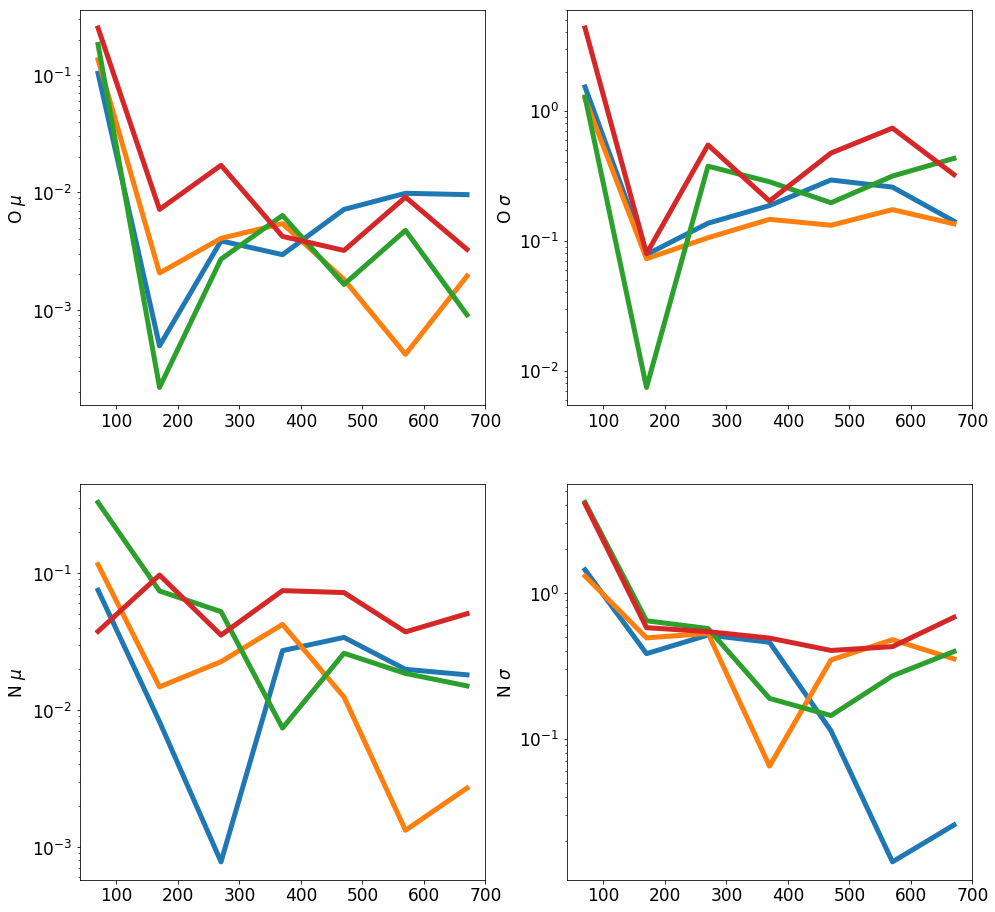

In [23]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16,16)

for i, phase in enumerate(['Molecular','CNM','WNM','WIM','HIM']):
    if phase == 'Disk':
        continue
        
    pdf_mean  = output_stats_data[phase]['O']['num_pdf_mean']
    mean      = output_stats_data[phase]['O']['mean']
    pdf_std   = output_stats_data[phase]['O']['num_pdf_std']
    std       = output_stats_data[phase]['O']['std']
    ln_pdf_mean = np.log(  pdf_mean / np.sqrt(1.0 + pdf_std**2/pdf_mean**2))
    ln_pdf_std  = np.sqrt(  np.log(1.0 + pdf_std**2/pdf_mean**2))
    
    mean_err  = np.abs((mean - ln_pdf_mean)/ln_pdf_mean)
    std_err  = np.abs((std - ln_pdf_std)/ln_pdf_std)
    
    # mean = np.exp(M + 0.5*S**2)
    # std  = np.sqrt(np.exp(S**2 + 2.0 * M)*(np.exp(S*S) - 1.0))
    
    #select = 
        
    ax[(0,0)].plot(ds_list, mean_err, lw = 5, ls = '-', label = phase)
    ax[(0,1)].plot(ds_list, std_err ,  lw = 5, ls = '-', label = phase)
    ax[(0,0)].set_ylabel(r'O $\mu$')
    ax[(0,1)].set_ylabel(r'O $\sigma$')
    
    pdf_mean  = output_stats_data[phase]['N']['num_pdf_mean']
    mean      = output_stats_data[phase]['N']['mean']
    pdf_std   = output_stats_data[phase]['N']['num_pdf_std']
    std       = output_stats_data[phase]['N']['std']
    ln_pdf_mean = np.log(  pdf_mean / np.sqrt(1.0 + pdf_std**2/pdf_mean**2))
    ln_pdf_std  = np.sqrt(  np.log(1.0 + pdf_std**2/pdf_mean**2))
    
    mean_err  = np.abs((mean - ln_pdf_mean)/ln_pdf_mean)
    std_err  = np.abs((std - ln_pdf_std)/ln_pdf_std)
    
    # mean = np.exp(M + 0.5*S**2)
    # std  = np.sqrt(np.exp(S**2 + 2.0 * M)*(np.exp(S*S) - 1.0))
    
    #select = 
    
    ax[(1,0)].plot(ds_list, mean_err, lw = 5, ls = '-', label = phase)
    ax[(1,1)].plot(ds_list, std_err ,  lw = 5, ls = '-', label = phase)
    ax[(1,0)].set_ylabel(r'N $\mu$')
    ax[(1,1)].set_ylabel(r'N $\sigma$')
    ax[(0,0)].semilogy()
    ax[(0,1)].semilogy()
    ax[(1,0)].semilogy()
    ax[(1,1)].semilogy()
    #ax[(0,1)].set_ylim(0,2)
    #ax[(1,1)].set_ylim(0,2)
    
for a in [(0,0),(0,1),(1,0),(1,1)]:
#    ax[a].set_xlim(0.0, np.max(time))
    ax[a].set_xlabel('Time (Myr)')
    
#ax[1].semilogy()
#ax[0].set_ylim(-8, -2)
#ax[1].set_ylim(1.0E-1, 100.0)

#ax[(0,0)].set_ylim(-12,-5)
#ax[(1,0)].set_ylim(-17,-10)


    
ax[(0,0)].legend(loc='best')


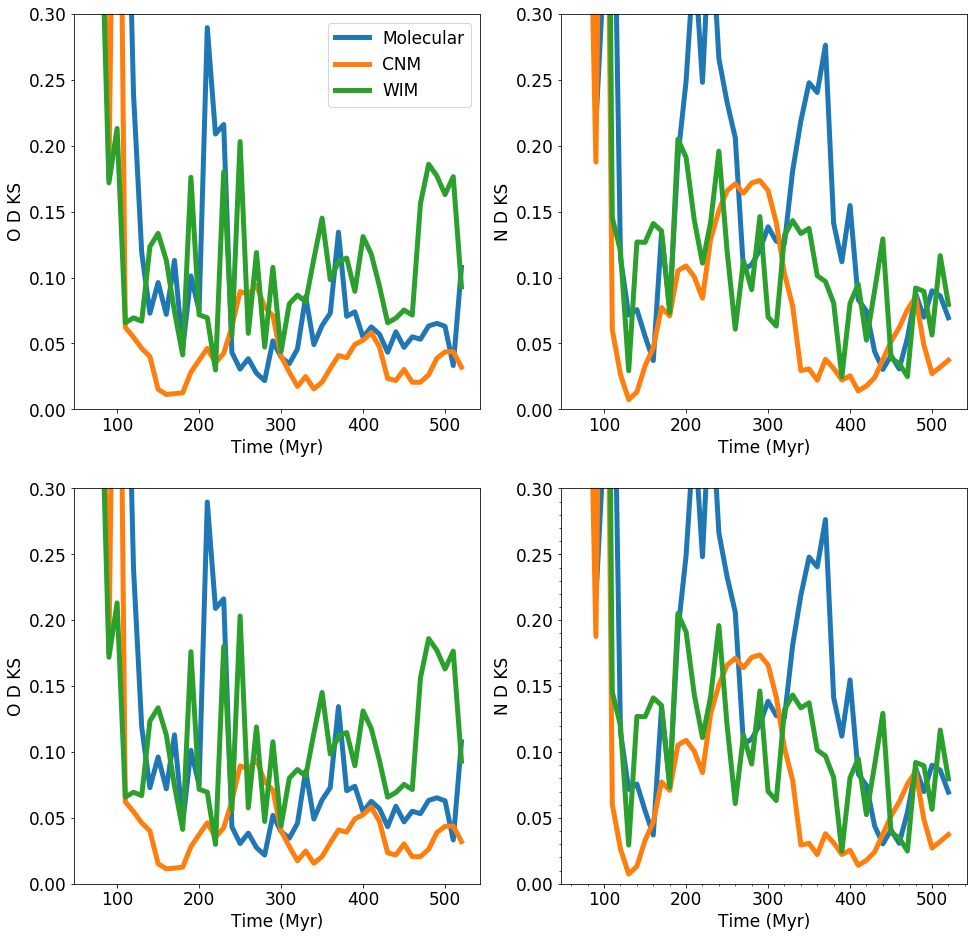

In [10]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16,16)

for i, phase in enumerate(['Molecular','CNM','WIM']):#'WNM','WIM','HIM']):
    if phase == 'Disk':
        continue
        
    
    # mean = np.exp(M + 0.5*S**2)
    # std  = np.sqrt(np.exp(S**2 + 2.0 * M)*(np.exp(S*S) - 1.0))
    
    y = output_stats_data[phase]['O']['D_KS']
    ax[(0,0)].plot(ds_list, y, lw = 5, ls = '-', label = phase)
    #print phase, 'O', output_stats_data[phase]['O']['KS_alpha']
    ax[(1,0)].plot(ds_list, y ,  lw = 5, ls = '-', label = phase)
    ax[(0,0)].set_ylabel(r'O D KS')
    ax[(1,0)].set_ylabel(r'O D KS')
    
    #mean  = output_stats_data[phase]['N']['mean']
    #std  = output_stats_data[phase]['N']['std']
    
    # mean = np.exp(M + 0.5*S**2)
    # std  = np.sqrt(np.exp(S**2 + 2.0 * M)*(np.exp(S*S) - 1.0))
    
    #select = 
    
    y = output_stats_data[phase]['N']['D_KS']
    ax[(0,1)].plot(ds_list, y, lw = 5, ls = '-', label = phase)
    #print phase, 'O', output_stats_data[phase]['N']['KS_alpha']
    ax[(1,1)].plot(ds_list, y ,  lw = 5, ls = '-', label = phase)
    ax[(0,1)].set_ylabel(r'N D KS')
    ax[(1,1)].set_ylabel(r'N D KS')
    #ax[(1,0)].set_ylim(0,2)
    #ax[(1,1)].set_ylim(0,2)
    
for a in [(0,0),(0,1),(1,0),(1,1)]:
    ax[a].set_ylim(0.0,0.3)
    ax[a].set_xlabel('Time (Myr)')
plt.minorticks_on()
#ax[1].semilogy()
#ax[0].set_ylim(-8, -2)
#ax[1].set_ylim(1.0E-1, 100.0)

    
ax[(0,0)].legend(loc='best')


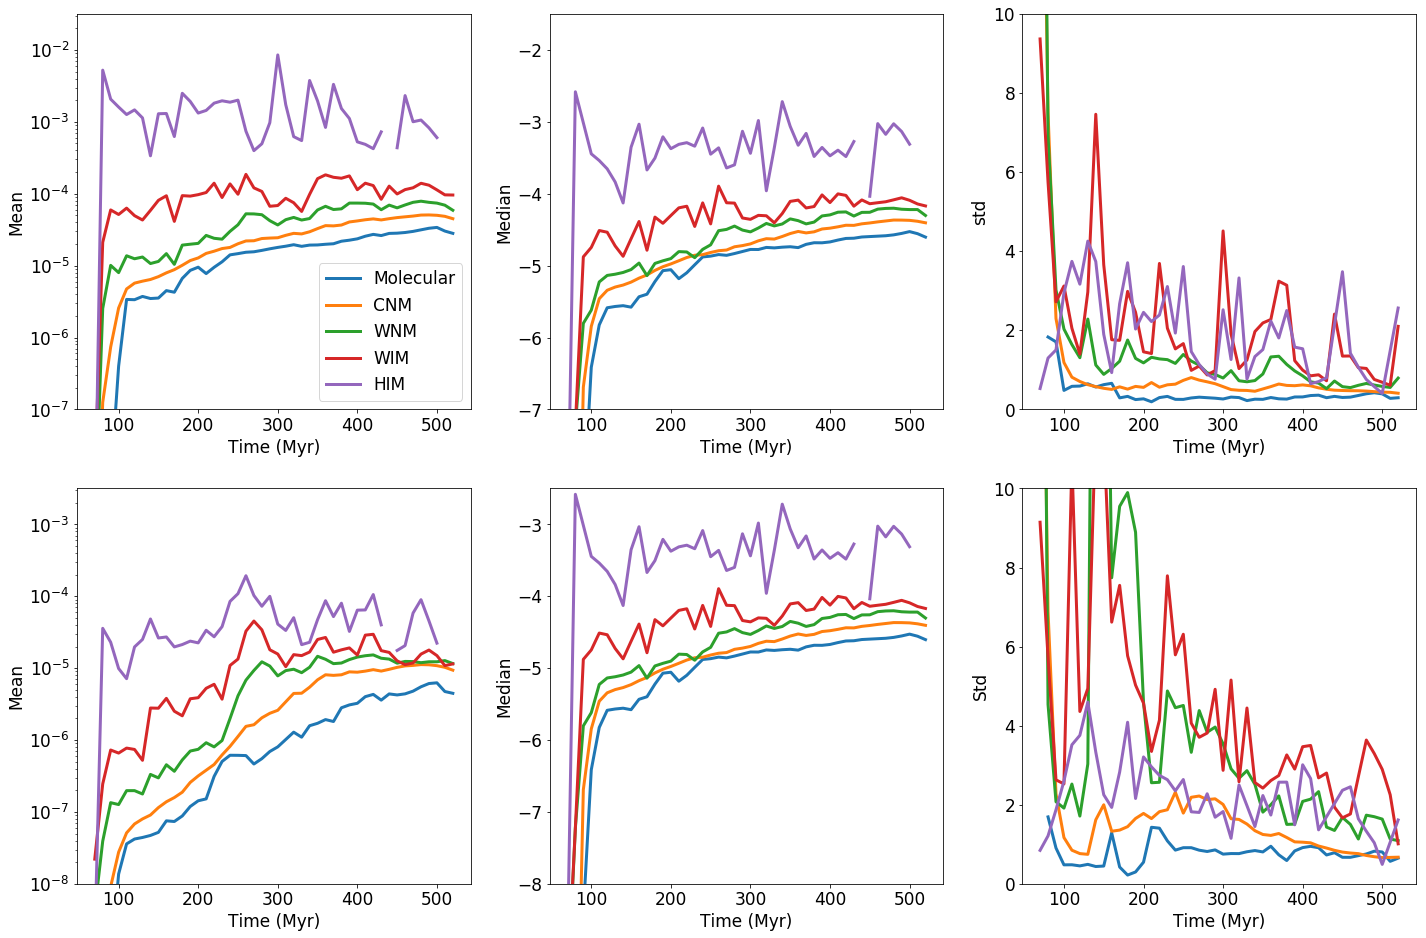

In [11]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(24,16)

for i, phase in enumerate(['Molecular','CNM','WNM','WIM','HIM']):
    if phase == 'Disk':
        continue
        
    mean  = output_stats_data[phase]['O']['actual_mean']
    iqr  = output_stats_data[phase]['O']['actual_IQR']
    median = output_stats_data[phase]['O']['actual_median']
    std = output_stats_data[phase]['O']['actual_std']
    select = std != np.array(None)
    ds_list = np.array(ds_list)
    
        # mean = np.exp(M + 0.5*S**2)
    # std  = np.sqrt(np.exp(S**2 + 2.0 * M)*(np.exp(S*S) - 1.0))
    
    #select = 
    #mean = np.log10(mean)
    #median = np.log10(median)
    #std = np.log10(std)
    ax[(0,0)].plot(ds_list, mean, lw = 3, ls = '-', label = phase)
    ax[(0,1)].plot(ds_list, median ,  lw = 3, ls = '-', label = phase)
    ax[(0,2)].plot(ds_list[select], np.array(std[select]) /np.array(mean[select]), lw = 3, ls = '-', label = phase)
    ax[(0,0)].set_ylabel(r'Mean')
    ax[(0,1)].set_ylabel(r'Median')
    ax[(0,2)].set_ylabel(r'std')
    
    mean  = output_stats_data[phase]['N']['actual_mean']
    iqr  = output_stats_data[phase]['N']['actual_IQR']
    meadian  = output_stats_data[phase]['N']['actual_median']
    std = output_stats_data[phase]['N']['actual_std']
    select = std != np.array(None)


    
    # mean = np.exp(M + 0.5*S**2)
    # std  = np.sqrt(np.exp(S**2 + 2.0 * M)*(np.exp(S*S) - 1.0))
    
    #select = 
    
    #mean = np.log10(mean)
    #median = np.log10(median)
    #std = np.log10(std)
    
    ax[(1,0)].plot(ds_list, mean, lw = 3, ls = '-', label = phase)
    ax[(1,1)].plot(ds_list, median ,  lw = 3, ls = '-', label = phase)
    ax[(1,2)].plot(ds_list[select],  np.array(std[select]) /np.array(mean[select]), lw = 3, ls = '-', label = phase)

    ax[(1,0)].set_ylabel(r'Mean')
    ax[(1,1)].set_ylabel(r'Median')
    ax[(1,2)].set_ylabel(r'Std')
    
    
    #ax[(0,2)].set_ylim(0,2)
    #ax[(1,2)].set_ylim(0,2)
    
for a in [(0,0),(0,1),(1,0),(1,1), (0,2),(1,2)]:
#    ax[a].set_xlim(0.0, np.max(time))
    ax[a].set_xlabel('Time (Myr)')
    
for a in [(0,0),(1,0)]:
    ax[a].semilogy()
    
ax[(0,0)].set_ylim(1.0E-7, 10**(-1.5))
ax[(0,1)].set_ylim(-7, -1.5)
ax[(0,2)].set_ylim(0.0, 10.0)

#ax[(0,2)].set_ylim(1.0E-7, 10**(-1.5))
#ax[1].semilogy()
#ax[0].set_ylim(-8, -2)
#ax[1].set_ylim(1.0E-1, 100.0)


ax[(1,0)].set_ylim(1.0E-8, 10**(-2.5))
ax[(1,1)].set_ylim(-8, -2.5)
#ax[(1,2)].set_ylim(1.0E-8, 10**(-2.5))
#ax[(0,0)].set_ylim(-12,-5)
ax[(1,2)].set_ylim(0.0, 10.0)


    
ax[(0,0)].legend(loc='best')


In [24]:

# convert to an array we can plot as a function of time
output_stats_data = {}
for phase in phases:
    output_stats_data[phase] = {}
    for e in ele:
        output_stats_data[phase][e] = {}        
        for k in output_stats[ds_list[0]][phase][e].keys():
            output_stats_data[phase][e][k] = np.array( [output_stats[x][phase][e][k] for x in ds_list])

KeyError: 'O'

In [19]:
output_stats_data['CNM']['O']['mean']

array([-13.92550261,  -6.9415932 , -11.66855442])

/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in log


80 O -9.512303 2.830116 0.168037
80 Fe -13.368412 1.915730 0.317359
80 N -13.269002 1.686768 0.183986
80 Ba -29.310803 1.681067 0.323073
90 O -6.381082 2.307049 0.233678
90 Fe -9.981738 2.763542 0.140886
90 N -11.783274 1.733626 0.081976
90 Ba -26.233532 2.057379 0.147836
100 O -9.228178 1.843883 0.087490
100 Fe -10.860137 1.908316 0.177293
100 N -13.581245 1.626131 0.039831
100 Ba -28.659631 1.740323 0.058099
110 O -7.449120 1.711730 0.046918
110 Fe -11.999142 1.200579 0.232842
110 N -12.272792 1.384291 0.132778
110 Ba -27.302974 1.383174 0.153592
120 O -11.095546 1.307310 0.331384
120 Fe -14.457978 1.435700 0.426048
120 N -14.095509 1.553067 0.135873
120 Ba -29.621580 1.334136 0.209634
130 O -8.780632 1.478465 0.084738
130 Fe -10.787470 1.467284 0.140693
130 N -13.059716 1.151840 0.085371
130 Ba -28.289253 1.307003 0.098954
140 O -5.479949 2.437405 0.311128
140 Fe -10.228261 1.306827 0.064970
140 N -10.785864 1.820865 0.150669
140 Ba -25.258105 2.138528 0.254262
150 O -8.047653 1.281

/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in divide


520 O -7.056444 0.610817 0.045732
520 Fe -7.476077 1.006786 0.133965
520 N -10.245649 0.270348 0.014061
520 Ba -25.217409 0.358513 0.060145
530 O -9.242173 0.084711 0.971580
530 Fe -7.938890 1.090058 0.227583
530 N -10.999460 0.523091 0.141733
530 Ba -25.154642 0.869062 0.063171
540 O -5.287729 0.241529 0.049077
540 Fe -3.533085 0.259218 0.035744
540 N -10.668997 0.175677 0.129419
540 Ba -25.488810 0.181022 0.122600
550 O -8.354730 0.655153 0.195347
550 Fe -10.050289 1.209870 0.152327
550 N -11.809789 0.521912 0.191836
550 Ba -26.738432 0.493554 0.199853


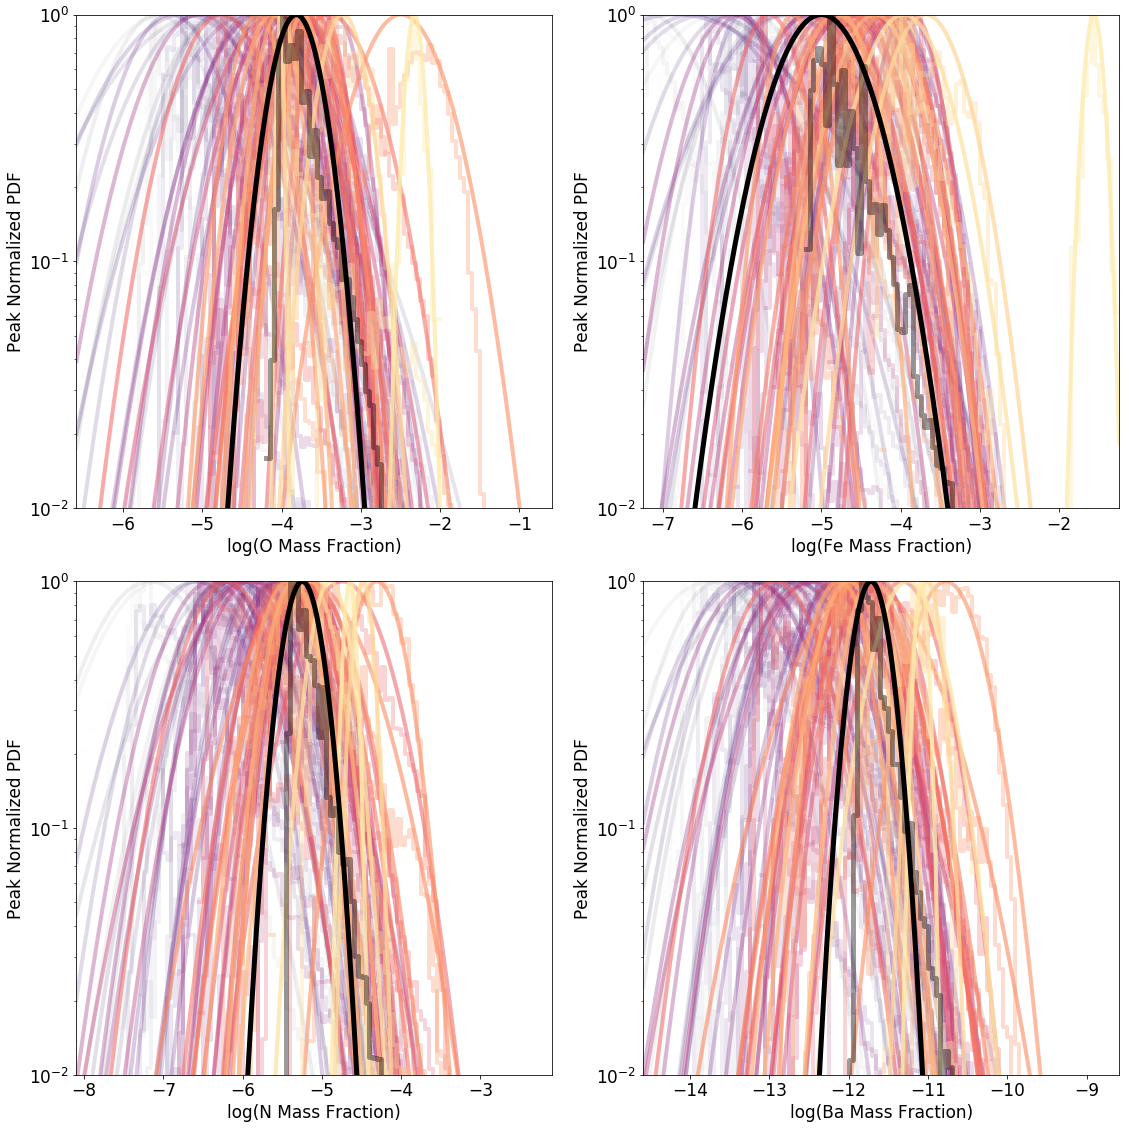

In [113]:
nrow = 2
ncol = 2

ninch = 8

fig, all_ax = plt.subplots(nrow,ncol)
fig.set_size_inches(ninch*ncol,ninch*nrow)

fbins   = data['DD0100']['Disk']['mass_fraction']['bins']
binsize =       (fbins[1:]) - (fbins[:-1])
centers = 0.5 * (fbins[1:] + fbins[:-1])

# phase = 'Molecular'
# field = 'O_Fraction'
ylim = [0.0,6]

ds_list = np.arange(80, 551, 10) # [ 100, 150, 200, 250, 300, 350]
ele = ['O','Fe','N','Ba']
phase = 'HIM'


min_median = 1.0E80
max_median = -1.0E80

axi = 0
axj = 0
phases = ['Molecular','CNM','WNM','WIM','HIM','Disk']
phase_labels = ['Molecular','Cold Neutral','Warm Neutral','Warm Ionized','Hot Ionized','All ISM']


mean_phase = {}
std_phase  = {}
actual_mean_phase = {}
actual_std_phase  = {}
time = np.zeros(np.size(ds_list))

#for k in phases:
#    mean_phase[k] = np.zeros(np.size(ds_list))
#    std_phase[k]  = np.zeros(np.size(ds_list))
#    actual_mean_phase[k] = np.zeros(np.size(ds_list))
#    actual_std_phase[k]  = np.zeros(np.size(ds_list))


def _load_data(ldata, dsname, phase, field, centers = None):
    y      = ldata[dsname][phase]['mass_fraction'][field]['hist']
    mean   = ldata[dsname][phase]['mass_fraction'][field]['mean']
    std    = ldata[dsname][phase]['mass_fraction'][field]['std']
    label  = ldata[dsname]['general']['Time'] - 46.0
    
    #if (not ('median' in ldata[dsname][phase]['mass_fraction'][field].keys())):
    median = np.log10(np.interp(0.5, np.cumsum(y)/(1.0*np.sum(y)), centers))
    #else:
    #    print 'loading median from file'
    #    median = ldata[dsname][phase]['mass_fraction'][field]['median']
        
    return y, mean, median, std, label

xmin = 10000
xmax = -1000000

plot_median = {}

D_KS_dict = {}
for e in ele:
    D_KS_dict[e] = np.zeros(np.size(ds_list))


for i,j in enumerate(ds_list):
    dsname = 'DD%0004i'%(j)
    axi = 0
    axj = 0
    for ip, element in enumerate(ele):
       # print axi, axj, phase
        if nrow == 1:
            axindex = axj
        else:
            axindex = (axi,axj)
            
        ax    = all_ax[axindex]
        field = element + '_Fraction'
        
        centers = 0.5 * (fbins[1:] + fbins[:-1])
        y, mean, median, std, label = _load_data(data, dsname, phase, field, centers = centers)
        Mtot = data[dsname][phase]['general']['total_mass']
        
        frac   = 0.8
        alpha  = ((i / (np.size(ds_list)*1.0))) * frac
        halpha = ((i / (np.size(ds_list)*1.0))) * frac * 0.5
        color  = magma(alpha/frac) #'black' # viridis(alpha)    
        
        if j == ds_list[-1]:
            color = 'black'

        if mean is None:
            continue
            
        xplot, mean_fit, std_fit, output = _compute_fit_and_plot(ax, fbins, y, mean = mean, median = median, std = std,
                                                         alpha = alpha, halpha = halpha, color = color, Mtot=Mtot)
        print "%i %s %f %f %f"%(j, element, output['mean'], output['std'], output['D_KS'])
        
        D_KS_dict[element][i] = output['D_KS']
       
        axj = axj + 1
        
        if axj >= ncol:
            axi = axi + 1
            axj = 0

    
        min_median = np.min([median, min_median])
        max_median = np.max([median, max_median])

        xmin = np.min([np.log10(xplot[0]),xmin])
        xmax = np.max([np.log10(xplot[-1]),xmax])
        
        plot_median[element] = median
        
for i in np.arange(nrow):
    for j in np.arange(ncol):
        if nrow == 1:
            axindex = j
        else:
            axindex = (i,j)

        all_ax[axindex].set_xlim(xmax - 5, xmax)
        all_ax[axindex].semilogy()
        all_ax[axindex].set_ylim(1.0E-2,1.0)

        ba =  8
        ba = 0
        # all_ax[axindex].set_xlim(-7 - ba, -2.5 - ba)   

        # xy = (np.min(all_ax[axindex].get_xlim())+ 0.2,np.max(all_ax[axindex].get_ylim())*0.95)
        # all_ax[axindex].annotate(phase_labels[(3)*(i) + j], xy = xy, xytext=xy)
        all_ax[axindex].set_ylabel(r'Peak Normalized PDF')
    #ax.set_xlim( np.log10(min_median) - 2, np.log10(max_median) + 2)

count = 0
for i in np.arange(nrow):
    for j in np.arange(ncol):
        if nrow == 1:
            axindex = j
        else:
            axindex = (i,j)
        e = ele[count]
        all_ax[axindex].set_xlim(  plot_median[e] - 3, plot_median[e] + 3)
        all_ax[axindex].set_xlabel(r'log(' + e +' Mass Fraction)')
        count = count + 1

#ax[(0,0)].set_xlim(
#ax[(0,0)].

#fig.savefig(field + '_phase_evolution.png')
plt.tight_layout()
fig.savefig('lognorm_O_Fe_N_Ba.png')

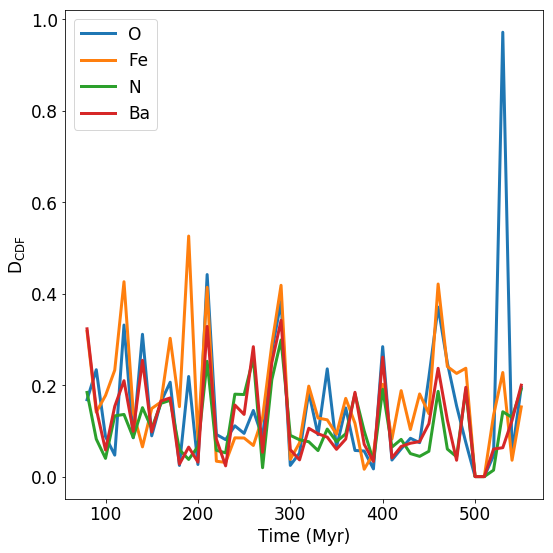

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
for e in ele:
    ax.plot(ds_list, D_KS_dict[e], lw = 3, label = e)
ax.set_xlabel('Time (Myr)')
ax.set_ylabel(r'D$_{\rm CDF}$')
plt.tight_layout()
ax.legend(loc = 'best')

['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
['Ba', 'Y', 'As', 'Sr', 'Mn', 'Na', 'Ca', 'N', 'Ni', 'Mg', 'S', 'Si', 'Fe', 'C', 'O']


/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in log


Ba 43 -27.254323 0.833986 166329.132738 4056.808116
Y 36 -26.405511 0.594962 620585.694781 18252.520435
As 28 -26.459219 0.431763 1079840.357986 41532.321461
Sr 34 -24.781046 0.557439 463149.759378 14473.429981
Mn 38 -17.521111 0.478261 183841.897883 5106.719386
Na 27 -17.440527 0.413369 91946.807972 3677.872319
Ca 23 -14.749438 0.360769 555704.631711 26462.125320
N 39 -12.175206 0.764255 205056.241350 5542.060577
Ni 23 -12.590850 0.363077 47194.288987 2247.347095
Mg 22 -12.638301 0.365052 70910.264384 3545.513219
S 21 -12.703527 0.355095 72316.574912 3806.135522
Si 21 -11.956569 0.359146 50583.374516 2662.282869
Fe 28 -11.751800 0.399816 86148.219766 3313.393068
C 42 -11.045414 0.612149 166512.906264 4162.822657
O 25 -9.766605 0.385493 516330.696452 22449.160715


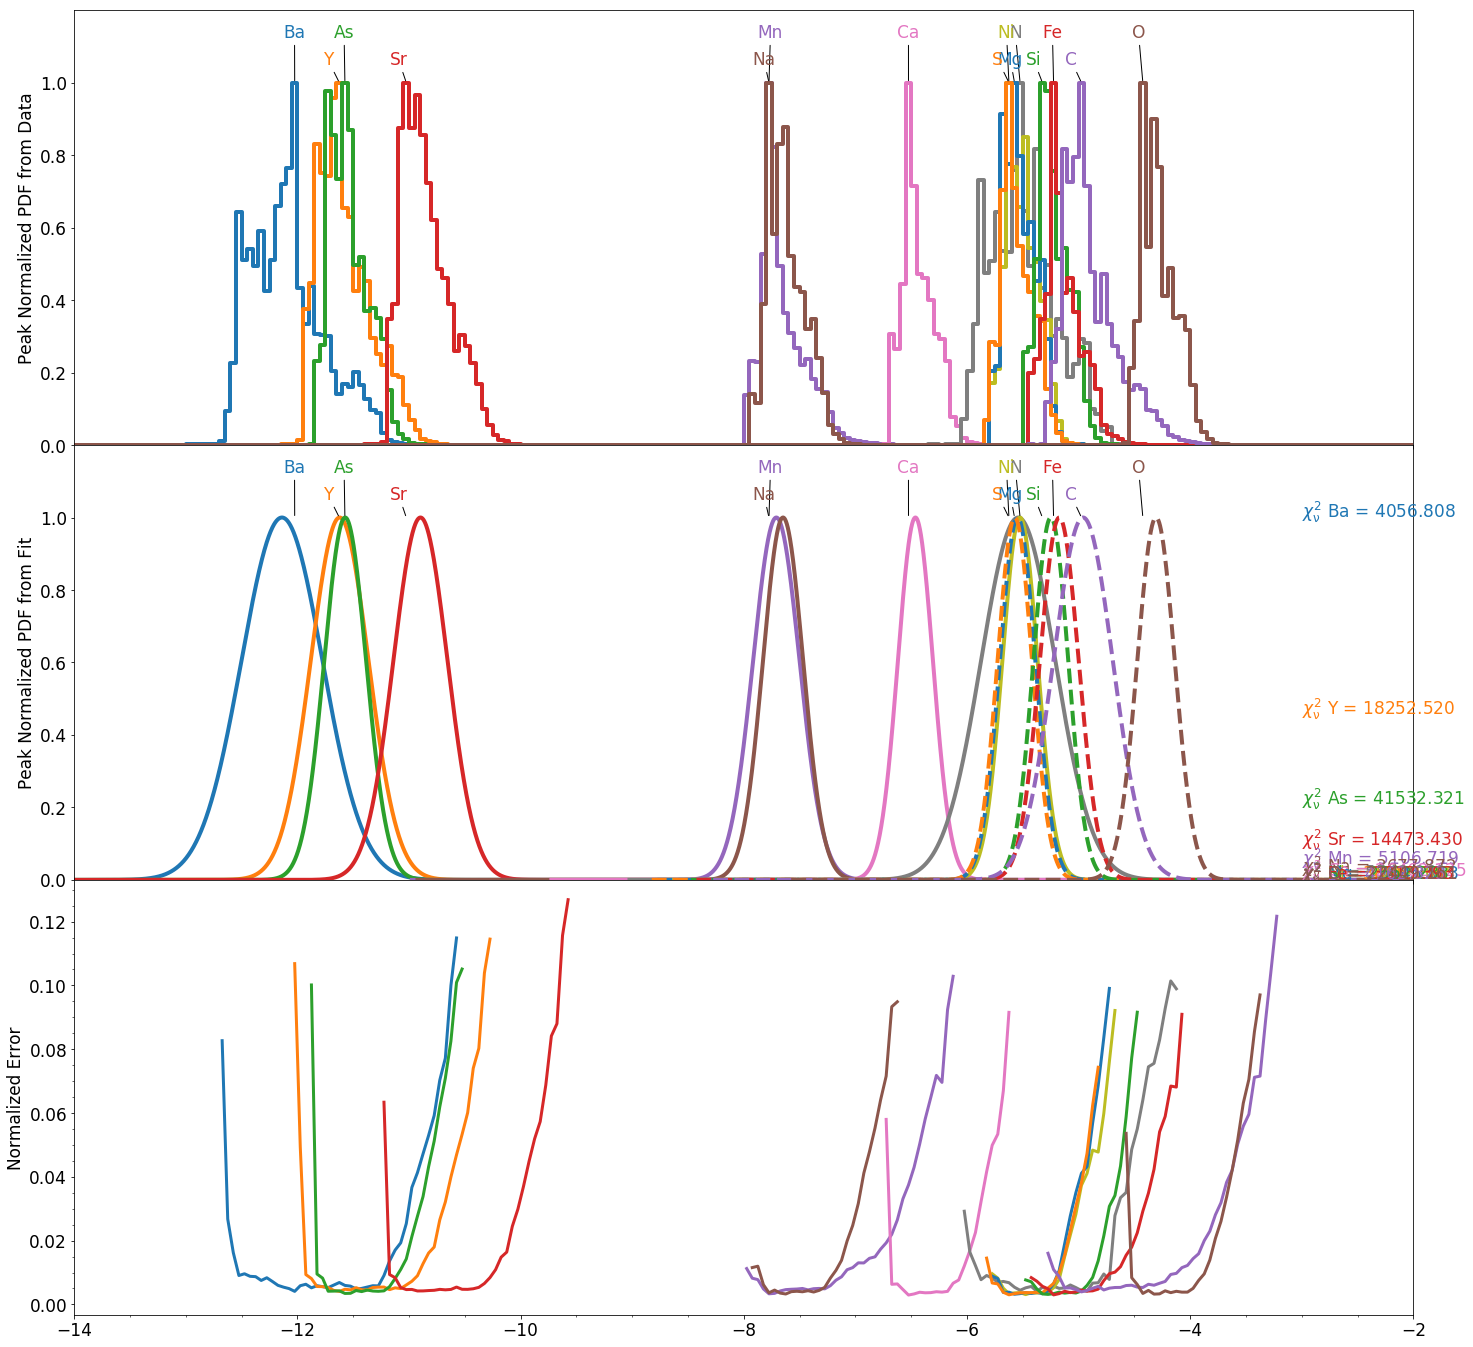

In [24]:
fig, ax = plt.subplots(3)
fig.set_size_inches(24,24)

ds_num = 750
dsname = 'DD%0004i'%(ds_num)

fbins   = data[dsname]['Disk']['mass_fraction']['bins']
binsize =       (fbins[1:]) - (fbins[:-1])
centers = 0.5 * (fbins[1:] + fbins[:-1])
# phase = 'Molecular'
# field = 'O_Fraction'

keys = data[dsname]['Disk']['mass_fraction'].keys()
keys = [k.split('_F')[0] for k in keys if '_Fraction' in k]
keys = [k for k in keys if len(k) <= 2]
elements = utilities.sort_by_anum([k for k in keys if not k in ['H','He','H1','H2']])
print elements
elements = ['Ba','Y','As','Sr','Mn','Na','Ca','N','Ni','Mg','S','Si','Fe','C','O']
print elements

def _load_data(ldata, dsname, phase, field, centers = None):
    y      = ldata[dsname][phase]['mass_fraction'][field]['hist']
    mean   = ldata[dsname][phase]['mass_fraction'][field]['mean']
    std    = ldata[dsname][phase]['mass_fraction'][field]['std']
    label  = ldata[dsname]['general']['Time'] - 46.0
    
    #if (not ('median' in ldata[dsname][phase]['mass_fraction'][field].keys())):
    median = np.log10(np.interp(0.5, np.cumsum(y)/(1.0*np.sum(y)), centers))
    #else:
    #    print 'loading median from file'
    #    median = ldata[dsname][phase]['mass_fraction'][field]['median']
        
    return y, mean, median, std, label


plot_log = False # True

xmin = 10000
xmax = -1000000

colors = ['C' + str(i) for i in np.arange(9)]
lss     = ['-','--']
ci = li = 0

xprev = -1000
plot_median = {}


ymax_order = np.zeros(np.size(elements))
phase = 'Disk'    
for i, e in enumerate(elements):
    field = e + '_Fraction'
    y, mean, median, std, label = _load_data(data, dsname, phase, field, centers = centers)
    ymax_order[i] = np.argmax(y/binsize)
    
sort = np.argsort(ymax_order)
sort_e = np.array(elements)[sort]

label_pos = np.empty((np.size(elements),))
label_pos[::2] = 1
label_pos[1::2] = -1

label_pos = label_pos[sort]
#print sort_e
xychi_y = np.log10(10.0)
for i, e in enumerate(elements):
    dsname = 'DD%0004i'%(ds_num)
    
    field = e + '_Fraction'
        
    centers = 0.5 * (fbins[1:] + fbins[:-1])
    y, mean, median, std, label = _load_data(data, dsname, phase, field, centers = centers)
        
    frac   = 0.8
    alpha = halpha = 1.0
    # alpha  = ((i / (np.size(elements)*1.0))) * frac
    # halpha = ((i / (np.size(elements)*1.0))) * frac * 0.5
    # color  = magma(i/(1.0*np.size(elements))) #'black' # viridis(alpha)    
    
    color = colors[ci]
    ls    = lss[li]
    Mtot = data[dsname][phase]['general']['total_mass']

    _compute_fit_and_plot(ax[0], fbins, y,
                                                     alpha = alpha, halpha = halpha, color = color, Mtot=Mtot)
    
    xplot, mean_fit, std_fit, output = _compute_fit_and_plot(ax[1], fbins, y, mean = mean, median = median, std = std,
                                                     alpha = alpha, halpha = halpha, color = color, show_hist = False, ls = ls, Mtot = Mtot)
    print "%s %i %f %f %f %f"%(e, output['N'], output['mean'], output['std'], output['chisqr'], output['rchisqr'])
    
    
    ax[2].plot(np.log10(output['fit_x']), output['rel_error'], lw = 3, color = color)
    
    #if e == 'Mn':
    #    print y
    
    if plot_log:
        ytext = 4.0
    else:
        ytext = 1.05
    
    xtext = np.log10(centers[np.argmax(y/binsize)]) - 0.1 - 0.05
    xa    = np.log10(centers[np.argmax(y/binsize)])
    ya    = 1.0
    
    pos = label_pos[i]
    
    #if np.abs(xtext -xprev) < 0.2:
    if pos > 0:
        xtext = xtext + 0.05
        if plot_log:
            ytext = 2.0
            
        else:
            ytext = 1.125
    # pos   = pos * -1
        
    
    xy = (xtext, ytext)
    xya = (xa,ya)
    
    ax[0].annotate(e, xy = xya, xytext=xy, color = color, 
                   arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
    ax[1].annotate(e, xy = xya, xytext=xy, color = color, 
                   arrowprops=dict(arrowstyle="-",connectionstyle="arc3"))
    
    xychi = (-3, xychi_y)
    xychi_y = xychi_y*10.0**(-0.34)
    ax[1].annotate(r'$\chi^2_{\rm \nu}$ ' + e + ' = %0.3f'%(output['rchisqr']),
                   xy = xychi, xytext=xychi, color = color)
    
    xprev = xy[0]
        
    ci = ci + 1
    if ci >= np.size(colors):
        ci = 0
        li = li + 1
        
for i in [0,1]:
    ax[i].set_xlim(xmax - 5, xmax)
    if plot_log:
        ax[i].semilogy()
        ax[i].set_ylim(1.0E-5,8.0)
        ax[i].set_xlim(-14,-1.5)
        ax[i].set_xticks(np.arange(-14,-1))
    else:
        ax[i].set_ylim(0.0,1.2)
        ax[i].set_xlim(-14,-2)
        ax[i].set_xticks(np.arange(-14,-1))
        ax[i].set_yticks(np.arange(0,11,2)/10.0)
        
    ax[i].set_xlabel(r'log(Mass Fraction)')

ax[2].set_ylabel('Normalized Error')
ax[2].set_xlim(ax[1].get_xlim())
#ax[2].semilogy()

ax[0].set_ylabel('Peak Normalized PDF from Data')
ax[1].set_ylabel('Peak Normalized PDF from Fit')
    
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
plt.minorticks_on()
#ax[(0,0)].set_xlim(
#ax[(0,0)].

#fig.savefig(field + '_phase_evolution.png')
#plt.tight_layout()
outname = 'lognorm_all_elements_' + phase + '.png'
if plot_log:
    outname = 'log_' + outname
fig.savefig(outname)



['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
['Ba', 'Y', 'As', 'Sr', 'Mn', 'Na', 'Ca', 'N', 'Ni', 'Mg', 'S', 'Si', 'Fe', 'C', 'O']


/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in log


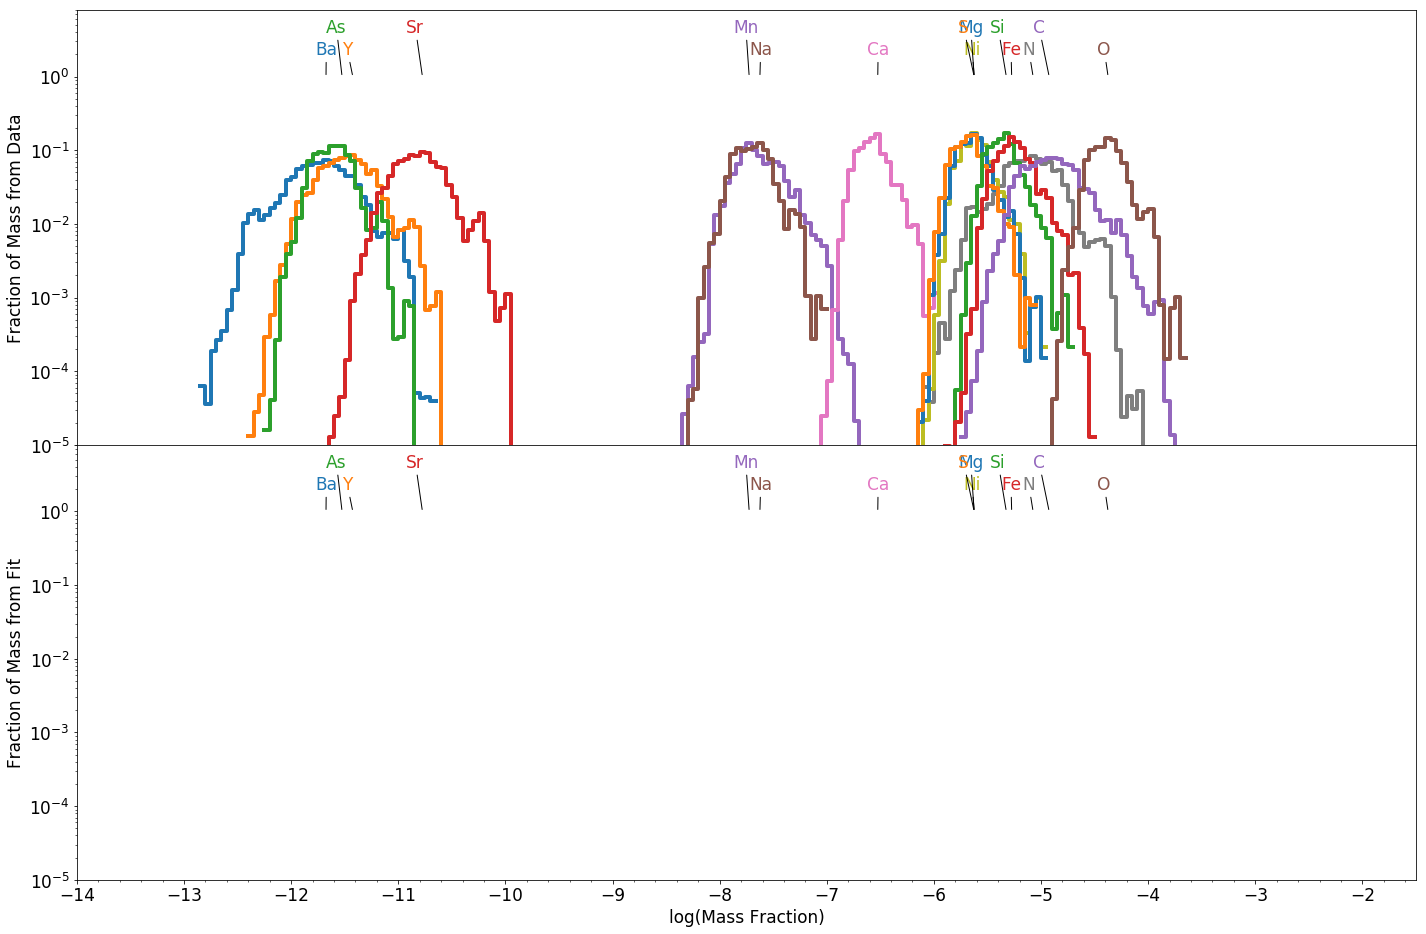

In [14]:
fig, ax = plt.subplots(2)
fig.set_size_inches(24,16)

fbins   = data[dsname]['Disk']['mass_fraction']['bins']
binsize =       (fbins[1:]) - (fbins[:-1])
centers = 0.5 * (fbins[1:] + fbins[:-1])
# phase = 'Molecular'
# field = 'O_Fraction'

keys = data[dsname]['Disk']['mass_fraction'].keys()
keys = [k.split('_F')[0] for k in keys if '_Fraction' in k]
keys = [k for k in keys if len(k) <= 2]
elements = utilities.sort_by_anum([k for k in keys if not k in ['H','He','H1','H2']])
print elements
elements = ['Ba','Y','As','Sr','Mn','Na','Ca','N','Ni','Mg','S','Si','Fe','C','O']
print elements

def _load_data(ldata, dsname, phase, field, centers = None):
    y      = ldata[dsname][phase]['mass_fraction'][field]['hist']
    mean   = ldata[dsname][phase]['mass_fraction'][field]['mean']
    std    = ldata[dsname][phase]['mass_fraction'][field]['std']
    label  = ldata[dsname]['general']['Time'] - 46.0
    
    #if (not ('median' in ldata[dsname][phase]['mass_fraction'][field].keys())):
    median = np.log10(np.interp(0.5, np.cumsum(y)/(1.0*np.sum(y)), centers))
    #else:
    #    print 'loading median from file'
    #    median = ldata[dsname][phase]['mass_fraction'][field]['median']
        
    return y, mean, median, std, label


plot_log = True

xmin = 10000
xmax = -1000000

colors = ['C' + str(i) for i in np.arange(9)]
lss     = ['-','--']
ci = li = 0

xprev = -1000
plot_median = {}


ymax_order = np.zeros(np.size(elements))
phase = 'CNM'    
for i, e in enumerate(elements):
    field = e + '_Fraction'
    y, mean, median, std, label = _load_data(data, dsname, phase, field, centers = centers)
    ymax_order[i] = np.argmax(y/binsize)
    
sort = np.argsort(ymax_order)
sort_e = np.array(elements)[sort]

label_pos = np.empty((np.size(elements),))
label_pos[::2] = 1
label_pos[1::2] = -1

label_pos = label_pos[sort]
#print sort_e
    

for i, e in enumerate(elements):
    dsname = 'DD%0004i'%(ds_num)
    
    field = e + '_Fraction'
        
    centers = 0.5 * (fbins[1:] + fbins[:-1])
    y, mean, median, std, label = _load_data(data, dsname, phase, field, centers = centers)
        
    frac   = 0.8
    alpha = halpha = 1.0
    # alpha  = ((i / (np.size(elements)*1.0))) * frac
    # halpha = ((i / (np.size(elements)*1.0))) * frac * 0.5
    # color  = magma(i/(1.0*np.size(elements))) #'black' # viridis(alpha)    
    
    color = colors[ci]
    ls    = lss[li]

    _compute_fit_and_plot(ax[0], fbins, y, plot_PDF = False,
                                                     alpha = alpha, halpha = halpha, color = color)
    
    xplot, mean_fit, std_fit, output = _compute_fit_and_plot(ax[1], fbins, y, mean = mean, median = median, std = std, plot_PDF = False,
                                                     alpha = alpha, halpha = halpha, color = color, show_hist = False, ls = ls)
    
    if plot_log:
        ytext = 4.0
    else:
        ytext = 1.05
    
    xtext = np.log10(centers[np.argmax(y)]) - 0.1 - 0.05
    xa    = np.log10(centers[np.argmax(y)])
    ya    = 1.0
    
    pos = label_pos[i]
    
    #if np.abs(xtext -xprev) < 0.2:
    if pos > 0:
        xtext = xtext + 0.05
        if plot_log:
            ytext = 2.0
            
        else:
            ytext = 1.125
    # pos   = pos * -1
        
    
    xy = (xtext, ytext)
    xya = (xa,ya)
    
    ax[0].annotate(e, xy = xya, xytext=xy, color = color, 
                   arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
    ax[1].annotate(e, xy = xya, xytext=xy, color = color, 
                   arrowprops=dict(arrowstyle="-",connectionstyle="arc3"))
    xprev = xy[0]
        
    ci = ci + 1
    if ci >= np.size(colors):
        ci = 0
        li = li + 1
        
for i in [0,1]:
    ax[i].set_xlim(xmax - 5, xmax)
    if plot_log:
        ax[i].semilogy()
        ax[i].set_ylim(1.0E-5,8.0)
        ax[i].set_xlim(-14,-1.5)
        ax[i].set_xticks(np.arange(-14,-1))
    else:
        ax[i].set_ylim(0.0,0.15)
        ax[i].set_xlim(-14,-2)
        ax[i].set_xticks(np.arange(-14,-1))
        ax[i].set_yticks(np.arange(0,1.5,0.2)/10.0)
        
    ax[i].set_xlabel(r'log(Mass Fraction)')


ax[0].set_ylabel('Fraction of Mass from Data')
ax[1].set_ylabel('Fraction of Mass from Fit')
    
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
plt.minorticks_on()
#ax[(0,0)].set_xlim(
#ax[(0,0)].

#fig.savefig(field + '_phase_evolution.png')
#plt.tight_layout()
outname = 'lognorm_int_all_elements_' + phase + '.png'
if plot_log:
    outname = 'log_' + outname
fig.savefig(outname)



In [ ]:
fig, ax = plt.subplots(2)
fig.set_size_inches(24,16)

ds_num  = 400
dsname = 'DD%0004i'%(ds_num)

fbins   = data[dsname]['Disk']['mass_fraction']['bins']
binsize =       (fbins[1:]) - (fbins[:-1])
centers = 0.5 * (fbins[1:] + fbins[:-1])
# phase = 'Molecular'
# field = 'O_Fraction'

keys = data[dsname]['Disk']['mass_fraction'].keys()
keys = [k.split('_F')[0] for k in keys if '_Fraction' in k]
keys = [k for k in keys if len(k) <= 2]
elements = utilities.sort_by_anum([k for k in keys if not k in ['H','He','H1','H2']])
print elements
elements = ['Ba','Y','As','Sr','Mn','Na','Ca','N','Ni','Mg','S','Si','Fe','C','O']
print elements

def _load_data(ldata, dsname, phase, field, centers = None):
    y      = ldata[dsname][phase]['mass_fraction'][field]['hist']
    mean   = ldata[dsname][phase]['mass_fraction'][field]['mean']
    std    = ldata[dsname][phase]['mass_fraction'][field]['std']
    label  = ldata[dsname]['general']['Time'] - 46.0
    
    #if (not ('median' in ldata[dsname][phase]['mass_fraction'][field].keys())):
    median = np.log10(np.interp(0.5, np.cumsum(y)/(1.0*np.sum(y)), centers))
    #else:
    #    print 'loading median from file'
    #    median = ldata[dsname][phase]['mass_fraction'][field]['median']
        
    return y, mean, median, std, label


plot_log = False

xmin = 10000
xmax = -1000000

colors = ['C' + str(i) for i in np.arange(9)]
lss     = ['-','--']
ci = li = 0

xprev = -1000
plot_median = {}


ymax_order = np.zeros(np.size(elements))
phase = 'Disk'    
for i, e in enumerate(elements):
    field = e + '_Fraction'
    y, mean, median, std, label = _load_data(data, dsname, phase, field, centers = centers)
    ymax_order[i] = np.argmax(y/binsize)
    
sort = np.argsort(ymax_order)
sort_e = np.array(elements)[sort]

label_pos = np.empty((np.size(elements),))
label_pos[::2] = 1
label_pos[1::2] = -1

label_pos = label_pos[sort]
#print sort_e
    
xychi_y = 0.9

for i, e in enumerate(elements):
    dsname = 'DD%0004i'%(ds_num)
    
    field = e + '_Fraction'
        
    centers = 0.5 * (fbins[1:] + fbins[:-1])
    y, mean, median, std, label = _load_data(data, dsname, phase, field, centers = centers)
        
    frac   = 0.8
    alpha = halpha = 1.0
    # alpha  = ((i / (np.size(elements)*1.0))) * frac
    # halpha = ((i / (np.size(elements)*1.0))) * frac * 0.5
    # color  = magma(i/(1.0*np.size(elements))) #'black' # viridis(alpha)    
    
    color = colors[ci]
    ls    = lss[li]

    _compute_fit_and_plot(ax[0], fbins, y, plot_CDF = True,
                                                     alpha = alpha, halpha = halpha, color = color)
    
    xplot, mean_fit, std_fit, output = _compute_fit_and_plot(ax[1], fbins, y, mean = mean, median = median, std = std, plot_CDF = True,
                                                     alpha = alpha, halpha = halpha, color = color, show_hist = False, ls = ls)
    
    
    p = np.exp( -7.01256*output['D_KS']**2 * (output['npoints'] + 2.78019) + 2.99587*output['D_KS']*(output['npoints']+2.78019)**(0.5) - 0.122119 + 0.97498/output['npoints']**(0.5) + 1.67997/output['npoints'] )
    
    print e, output['D_KS'], output['D_KS_alpha'], output['npoints'], p
    
    if plot_log:
        ytext = 4.0
    else:
        ytext = 1.05
    
    xtext = np.log10(centers[np.argmax(y)]) - 0.1 - 0.05
    xa    = np.log10(centers[np.argmax(y)])
    ya    = 1.0
    
    pos = label_pos[i]
    
    #if np.abs(xtext -xprev) < 0.2:
    if pos > 0:
        xtext = xtext + 0.05
        if plot_log:
            ytext = 2.0
            
        else:
            ytext = 1.125
    # pos   = pos * -1
        
    
    xy = (xtext, ytext)
    xya = (xa,ya)
    
    ax[0].annotate(e, xy = xya, xytext=xy, color = color, 
                   arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
    ax[1].annotate(e, xy = xya, xytext=xy, color = color, 
                   arrowprops=dict(arrowstyle="-",connectionstyle="arc3"))
    xprev = xy[0]
    
    xychi = (-4, xychi_y)
    xychi_y = xychi_y - 0.05
    ax[1].annotate(r'D$_{\rm CDF}$ %2s = %0.3f'%(e,output['D_KS']),
                   xy = xychi, xytext=xychi, color = color)        
    ci = ci + 1
    if ci >= np.size(colors):
        ci = 0
        li = li + 1
        
for i in [0,1]:
    ax[i].set_xlim(xmax - 5, xmax)
    if plot_log:
        ax[i].semilogy()
        ax[i].set_ylim(1.0E-5,8.0)
        ax[i].set_xlim(-14,-1.5)
        ax[i].set_xticks(np.arange(-14,-1))
    else:
        ax[i].set_ylim(0.0,1.2)
        ax[i].set_xlim(-14,-2)
        ax[i].set_xticks(np.arange(-14,-1))
        ax[i].set_yticks(np.arange(0,11,2)/10.0)
        
    ax[i].set_xlabel(r'log(Mass Fraction)')


ax[0].set_ylabel('Fraction of Mass from Data')
ax[1].set_ylabel('Fraction of Mass from Fit')
    
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
plt.minorticks_on()
#ax[(0,0)].set_xlim(
#ax[(0,0)].

#fig.savefig(field + '_phase_evolution.png')
#plt.tight_layout()
outname = 'lognorm_CDF_all_elements_' + phase + '.png'
if plot_log:
    outname = 'log_' + outname
fig.savefig(outname)



['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
['Ba', 'Y', 'As', 'Sr', 'Mn', 'Na', 'Ca', 'N', 'Ni', 'Mg', 'S', 'Si', 'Fe', 'C', 'O']


/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in log


Ba 0.208677108046 0.152498570333 63 3.09140571137e-07
Y 0.167509449765 0.153392997769 46 0.00239284055809
As 0.1098507806 0.154303349962 40 0.248184605154


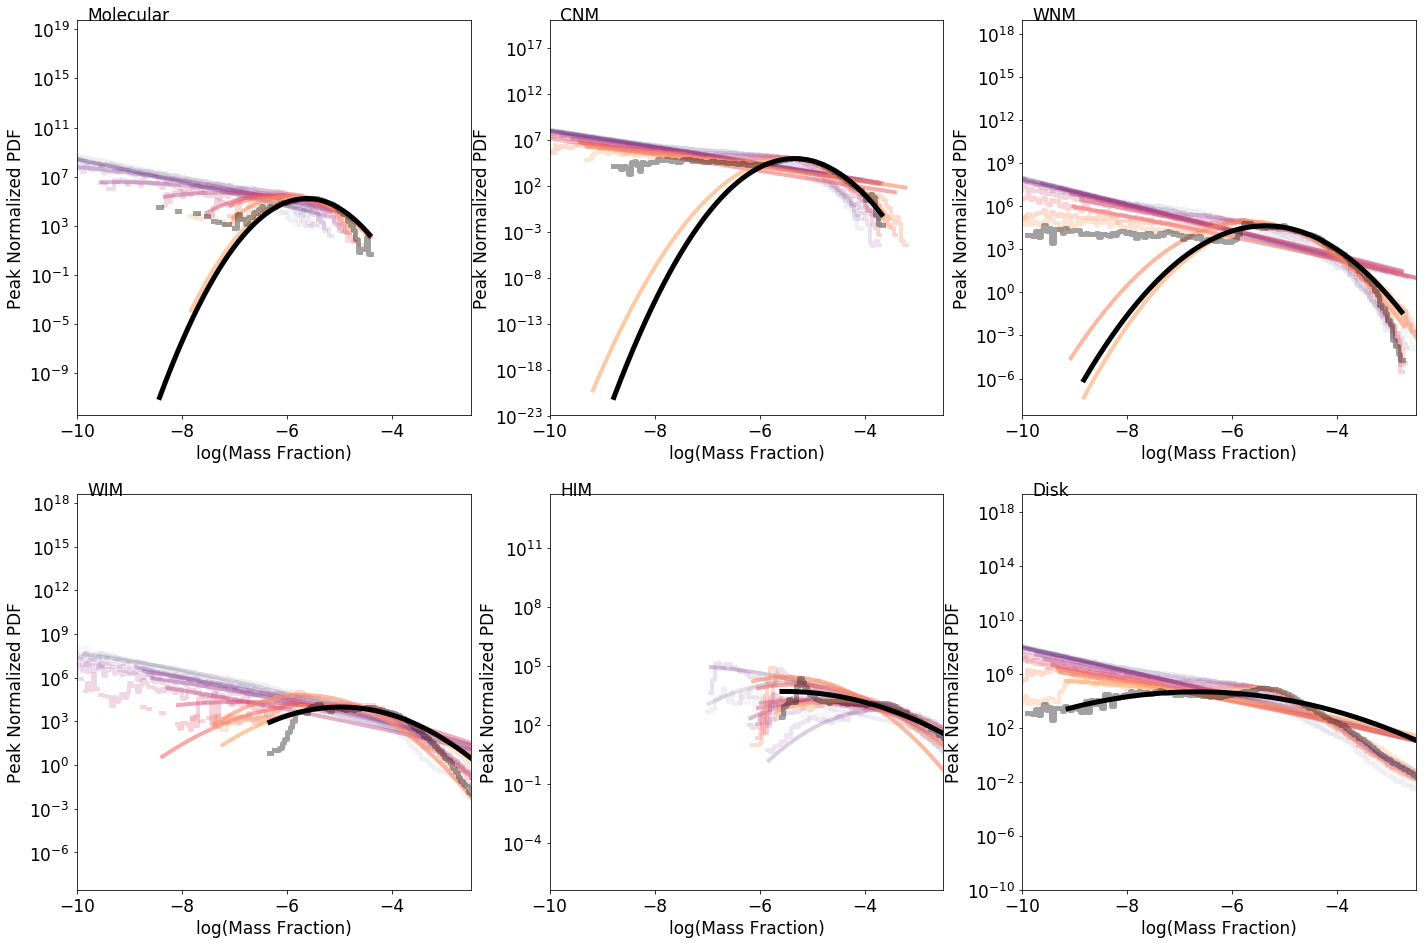

In [16]:
nrow = 2
ncol = 3

fig, all_ax = plt.subplots(nrow,ncol)
fig.set_size_inches(8*ncol,8*nrow)

fbins   = data['DD0100']['Disk']['mass_fraction']['bins']
binsize =       (fbins[1:]) - (fbins[:-1])
centers = 0.5 * (fbins[1:] + fbins[:-1])

phase = 'Molecular'
field = 'O_Fraction'
ylim = [0.0,6]

ds_list = np.arange(60, 120, 5)

min_median = 1.0E80
max_median = -1.0E80

axi = 0
axj = 0
phases = ['Molecular','CNM','WNM','WIM','HIM','Disk']


mean_phase = {}
std_phase  = {}
actual_mean_phase = {}
actual_std_phase  = {}
time = np.zeros(np.size(ds_list))

for k in phases:
    mean_phase[k] = np.zeros(np.size(ds_list))
    std_phase[k]  = np.zeros(np.size(ds_list))
    actual_mean_phase[k] = np.zeros(np.size(ds_list))
    actual_std_phase[k]  = np.zeros(np.size(ds_list))


xmin = 10000
xmax = -1000000


for i,j in enumerate(ds_list):
    dsname = 'DD%0004i'%(j)
    axi = 0
    axj = 0
    for ip, phase in enumerate(phases):
       # print axi, axj, phase
        ax = all_ax[(axi, axj)]
        
        y = data[dsname][phase]['mass_fraction'][field]['hist']
        mean = data[dsname][phase]['mass_fraction'][field]['mean']
        std = data[dsname][phase]['mass_fraction'][field]['std']
        median = np.log10(np.interp(0.5, np.cumsum(y)/(1.0*np.sum(y)), centers))
        label = data[dsname]['general']['Time'] - 46.0
    
       # centers = 0.5 * (fbins[1:] + fbins[:-1])
       # y, mean, median, std, label = _load_data(data, dsname, phase, field, centers = centers)
    
        min_median = np.min([median, min_median])
        max_median = np.max([median, max_median])
    
        frac = 0.8
        alpha = ((i / (np.size(ds_list)*1.0))) * frac
        halpha = ((i / (np.size(ds_list)*1.0))) * frac * 0.5
        color = magma(alpha/frac) #'black' # viridis(alpha)
        lw   = 4.0
        hlw  = 4.0
        if j == np.max(ds_list):
            color = 'black'
            alpha = 1.0
            lw    = 5.0
            hlw   = 5.0
    
        norm_y = y / binsize
        plot_bins = np.log10(fbins)
        norm = np.max(norm_y)
        norm = 1.0
        plot_histogram(ax, plot_bins, norm_y/norm, lw = hlw, color = color, alpha = halpha)

        selection = (y > 0) * (centers > 10**(median - 4)) * (centers < 10**(median+4))
        fit_x     = centers[selection]
        y_to_fit  = norm_y[selection]
    
        # take initial guess parameters from distribution values - compute logged dist values
        u_guess   = np.log( mean / (np.sqrt(1.0 + std*std/(mean*mean))))
        std_guess = np.sqrt(np.log(1.0 + std*std/(mean*mean)))
        xplot = np.logspace(np.log10(np.min(fit_x)), np.log10(np.max(fit_x)),4000)

        try:
            lognorm    = functions.lognormal()
            popt, pcov = lognorm.fit_function(fit_x, y_to_fit, p0 = [u_guess, std_guess])     
            xplot = np.logspace(np.log10(np.min(fit_x)), np.log10(np.max(fit_x)),4000)
            yplot = lognorm._f(xplot, *popt)
            
            norm = np.max(yplot)
            norm = 1.0
            ax.plot(np.log10(xplot), yplot/norm, lw = lw, color = color , ls = '-', alpha = alpha) #, label = 'Fit')     
        except:
            print phase, dsname, 'failure'
            popt = [None, None]
            
        mean_phase[phase][i] = popt[0]
        actual_mean_phase[phase][i] = mean
        std_phase[phase][i]  = popt[1]
        actual_std_phase[phase][i]  = std
        time[i]              = label
        
        axj = axj + 1
        
        if axj >= ncol:
            axi = axi + 1
            axj = 0
        

        xmin = np.min([np.log10(xplot[0]),xmin])
        xmax = np.max([np.log10(xplot[-1]),xmax])
        
        
for i in np.arange(2):
    for j in np.arange(3):
        all_ax[(i,j)].set_xlim(xmax - 5, xmax)
        #all_ax[(i,j)].set_ylim(1.0E-4,1.0)
        all_ax[(i,j)].semilogy()
        ba =  8
        ba = 0
        all_ax[(i,j)].set_xlim(-10 - ba, -2.5 - ba)   

        xy = (np.min(all_ax[(i,j)].get_xlim())+ 0.2,np.max(all_ax[(i,j)].get_ylim())*0.95)
        all_ax[(i,j)].annotate(phases[(3)*(i) + j], xy = xy, xytext=xy)
        all_ax[(i,j)].set_xlabel(r'log(Mass Fraction)')
        all_ax[(i,j)].set_ylabel(r'Peak Normalized PDF')
    #ax.set_xlim( np.log10(min_median) - 2, np.log10(max_median) + 2)

fig.savefig(field + '_phase_evolution.png')

In [17]:
time

array([ 13.99999461,  18.99999241,  23.99999574,  28.99999265,
        33.99999766,  38.99999479,  43.99999265,  48.99999002,
        53.99999051,  58.99999158,  63.99999229,  68.9999933 ])

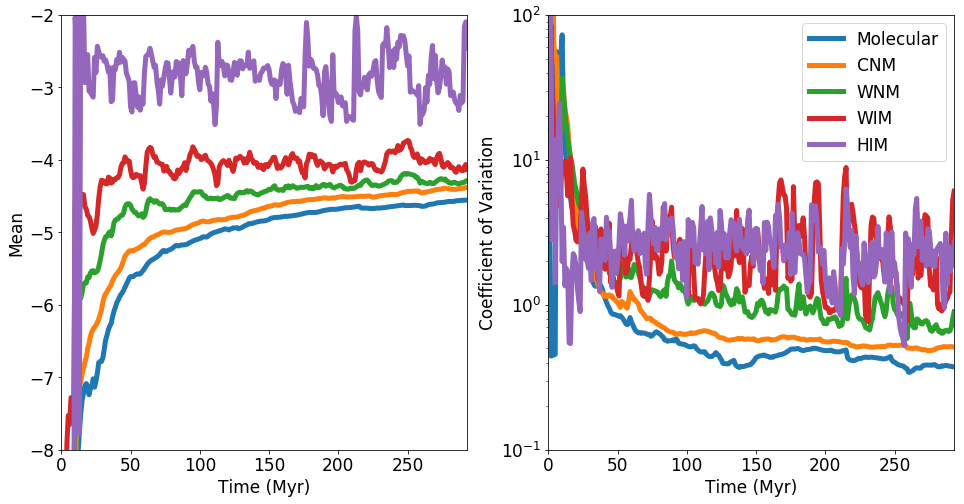

In [80]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

for i, phase in enumerate(phases):
    if phase == 'Disk':
        continue
    mean  = actual_mean_phase[phase]
    std  = actual_std_phase[phase]
    
    # mean = np.exp(M + 0.5*S**2)
    # std  = np.sqrt(np.exp(S**2 + 2.0 * M)*(np.exp(S*S) - 1.0))
    
    #select = 
    
    ax[0].plot(time, np.log10(mean), lw = 5, ls = '-')
    ax[1].plot(time, std / mean,  lw = 5, ls = '-', label = phase)

    ax[0].set_ylabel(r'Mean')
    ax[1].set_ylabel(r'Coefficient of Variation')
    
for a in [ax[0],ax[1]]:
    a.set_xlim(0.0, np.max(time))
    a.set_xlabel('Time (Myr)')
ax[1].semilogy()
ax[0].set_ylim(-8, -2)
ax[1].set_ylim(1.0E-1, 100.0)

    
    
ax[1].legend(loc='best')
fig.savefig('phase_mean_var_from_distribution.png')

/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


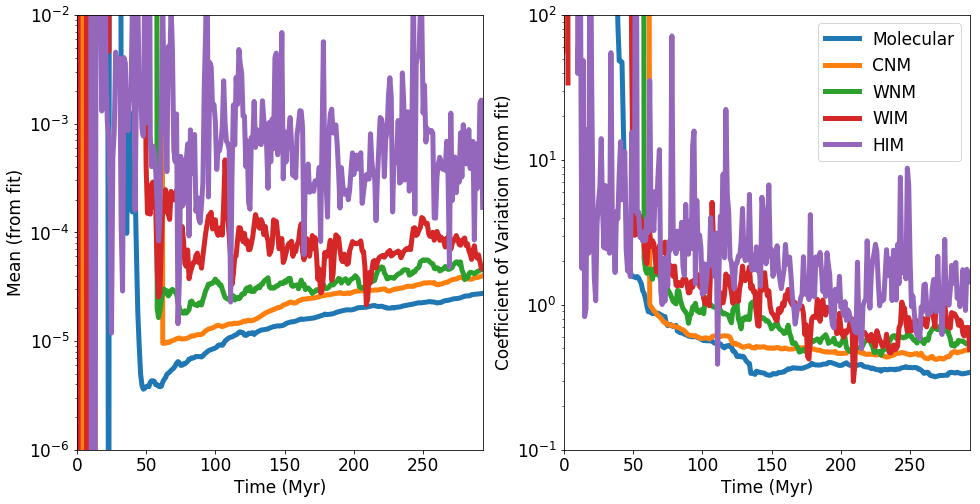

In [39]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

for i, phase in enumerate(phases):
    if phase == 'Disk':
        continue
    M  = mean_phase[phase]
    S  = std_phase[phase]
    
    mean = np.exp(M + 0.5*S**2)
    std  = np.sqrt(np.exp(S**2 + 2.0 * M)*(np.exp(S*S) - 1.0))
    
    #select = 
    
    ax[0].plot(time, mean, lw = 5, ls = '-')
    ax[1].plot(time, std / mean,  lw = 5, ls = '-', label = phase)

    ax[0].set_ylabel(r'Mean (from fit)')
    ax[1].set_ylabel(r'Coefficient of Variation (from fit)')
    
for a in [ax[0],ax[1]]:
    a.set_xlim(0.0, np.max(time))
    a.set_xlabel('Time (Myr)')
    a.semilogy()
ax[0].set_ylim(1.0E-6, 1.0E-2)
ax[1].set_ylim(0.1, 100.0)

    
    
ax[1].legend(loc='best')

fig.savefig('phase_mean_var_from_fit.png')

In [40]:
ptimes = ds_list # in Myr
dt = 100.0

bins = np.arange(-15,-2, 0.2)

all_hist = {}

for i, t in enumerate(ptimes):
    selection = ptypes.select_formed_stars(gal.ds, gal.df, np.max([t - dt, 0.0]), 
                                                             np.min([t + dt, np.max(ptimes)]))
    
    ydata = np.log10(gal.df['particle_O_fraction'][selection])
    hist, bins = np.histogram(ydata, bins = bins)
    hist = hist / (10**(bins[1:]) - 10**(bins[:-1])) / (1.0 * np.size(ydata)) # normalize to PDF
    
    all_hist[t] = hist


/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


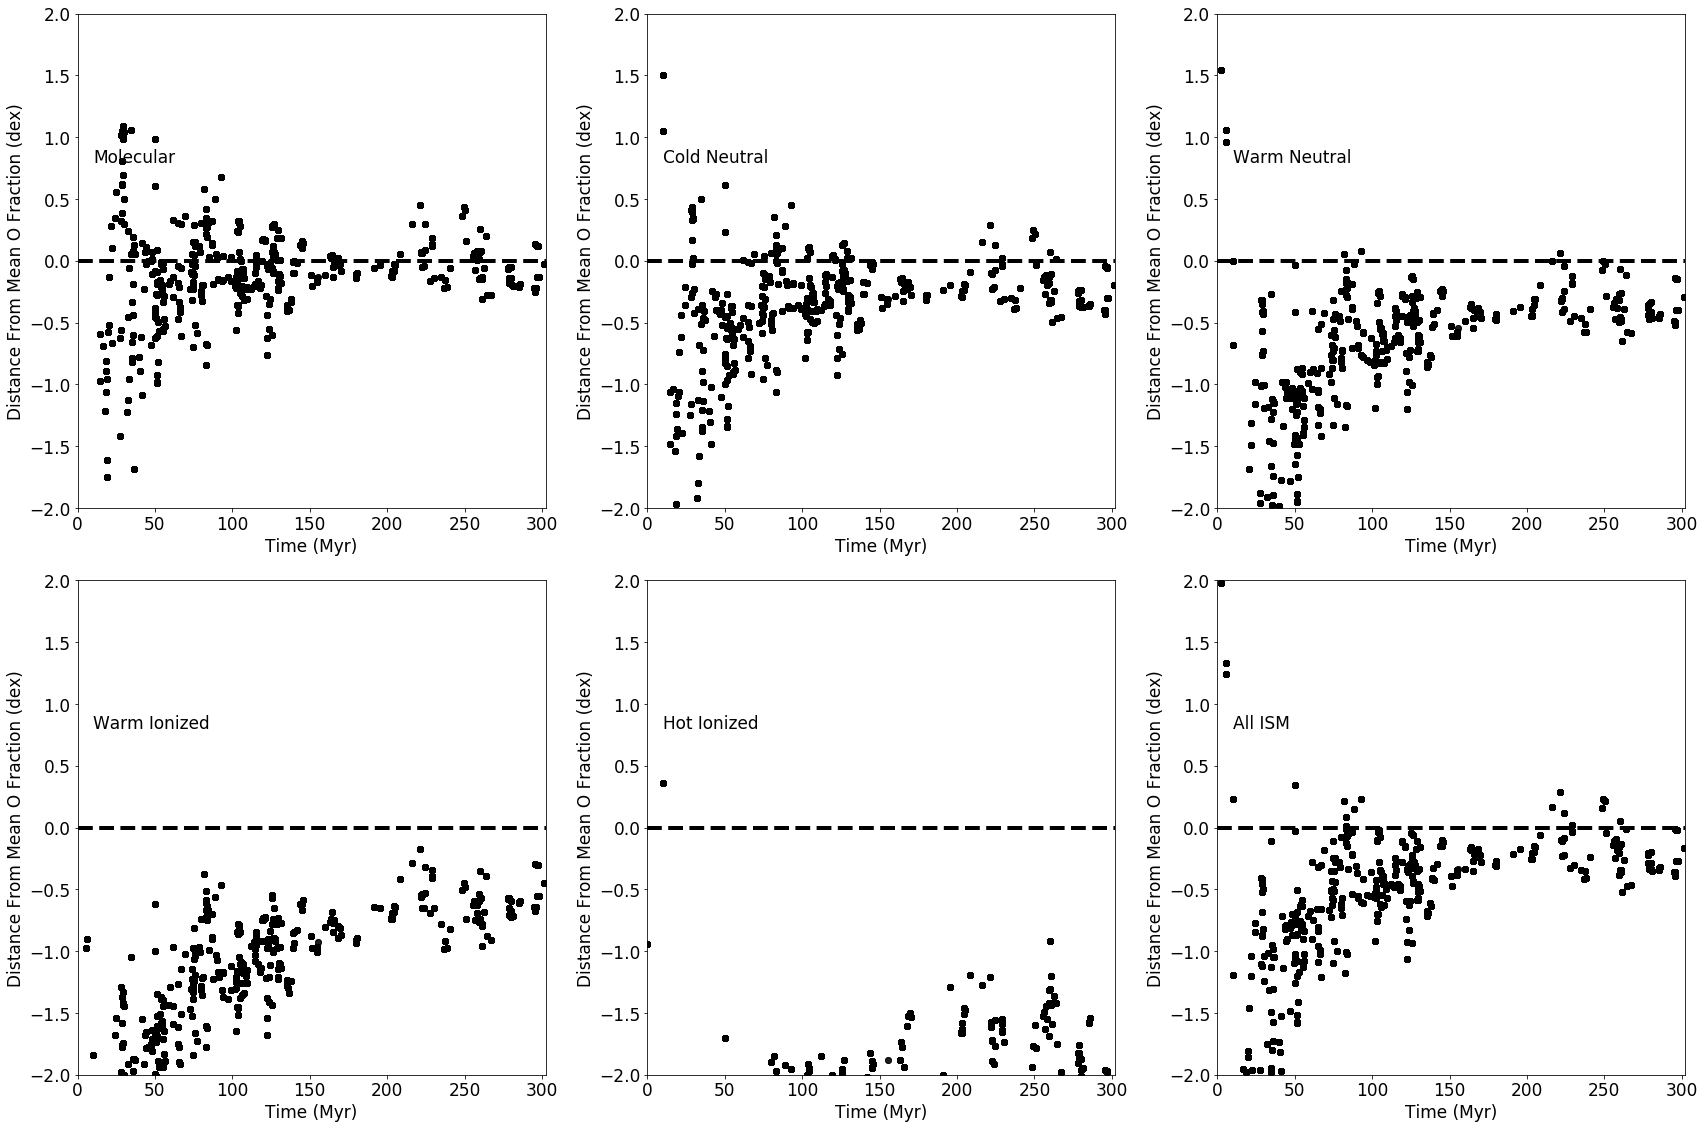

In [77]:
t_o    = gal.df['creation_time'].convert_to_units('Myr')
xdata  = time + 46.0

fig, all_axes = plt.subplots(2,3)
fig.set_size_inches(24,16)

axi = axj = 0
for i,phase in enumerate(['Molecular','CNM','WNM','WIM','HIM','Disk']):
    ax = all_axes[(axi,axj)]
    xdata  = time + 46.0

    mean = actual_mean_phase[phase]
    std  = actual_std_phase[phase]

#mean = np.exp(mol_mean + 0.5*mol_std**2)
#std  = np.sqrt(np.exp(mol_std**2 + 2.0 * mol_mean)*(np.exp(mol_std*mol_std) - 1.0))

    xdata = xdata[std>0]
    mean = mean[std>0]
    std  = std[std>0]

    # number of standard deviations away from mean for each star
    sigma_stars = (np.log10(gal.df['particle_O_fraction']) - np.log10(np.interp(t_o, xdata, mean))) #/ np.interp(t_o, xdata, std)

    x = gal.df[('io','particle_Fe_over_H')]
    ax.scatter(t_o - np.min(t_o), sigma_stars, alpha = 0.5, color = 'black')
    ax.set_xlim(np.min(t_o-np.min(t_o)), np.max(t_o-np.min(t_o)))
    #ax.set_xlim(-8,0)
    ax.set_ylim(-2,2)
    ax.plot(ax.get_xlim(), [0.0,0.0], color = 'black', lw = 4, ls = '--')
    ax.set_ylabel('Distance From Mean O Fraction (dex)')
    ax.set_xlabel('Time (Myr)')
    
    xy = (10.0, ax.get_ylim()[1] - 0.2)
    ax.annotate(phase_labels[i], xy=xy,xytext=xy)
    
    axj = axj + 1
    if axj >= 3:
        axj = 0
        axi = axi + 1
plt.tight_layout()
fig.savefig('stellar_distance_to_mean.png')

In [53]:
np.max(gal.df['particle_O_fraction'])

6.33349351965e-05 dimensionless

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

for i in [150, 200, 250, 300]:
    plot_histogram(ax, bins, all_hist[i] , lw = 3)
 #   print i, all_hist[i]
ax.set_xlabel('log(O Fraction)')
ax.set_ylabel('PDF')
ax.set_xlim(-8,-3)
ax.semilogy()

In [ ]:
    lognorm?


True
False
False
False
False
